In [1]:
from IPython.display import Image
img = 'Logo1.png' 
Image(url=img, width=800, height=100)

# Introduction

In March 2016, the 47th session of the United Nations (UN) Statistical Commission was organized to develop a framework to conquer the biggest global challenges of the world. During this session the global indicator framework was developed by the Inter-Agency and Expert Group on Sustainable Development Goal Indicators (IAEG-SDGs) and agreed to as possible working tool (DESA, 2018). 

This framework include “The Sustainable Development Goals”, which are the blueprint to achieve a better and sustainable future for every individual worldwide. The blueprint includes 17 goals that cover the global challenges and are interrelated. The main goal is to leave no individual behind. The formulation of several sub-goals within these 17 goals provide specific targets. These targets must be achieved by 2030 (United Nations, 2018). 

Every year, the status of progression considering the goals is reviewed according to the most up to date data available. The highlights of these data considering progression and remaining gaps were reported in  “The Sustainable Development Goals Report 2018”. In addition the interconnections across goals and targets are examined. In the report of 2018 the main conclusion was that people worldwide have a higher quality of life compared with a decade ago. However, the process on targets to make sure that no individual is left behind is lacking to meet the targets of 2030, which is a  disturbing conclusion (United Nations, 2018b).

One of these target goals is about gender equality. Goal five of the Sustainable Development Goals (SDG) wants to end all forms of discrimination against women and girls. This is not only a basic human right but will also help drive up economic growth and development across the boards (UNDP, 2018). There are still huge inequalities between men and women.

Globally, women earn only 77 cents for every dollar a man earns for doing the same work, less than 20% of the world's landholders are women, 7 in 10 women in the world experience physical and/or sexual violence at some point in their life’s and only 22.8% of all national parliamentarians were woman in 2016. However,  that's not all, still 750 million women and girls who are alive today were married before their 18th birthday (UNDP, 2018).

Child marriage is the third sub-goal of the gender equality goal. it states: *"Eliminate all harmful practices such as child, early and forced marriage and female genital mutilation"*

The target is to bring the proportion of women aged 20-24 years who were married or in a union before age 15 and before age 18 to zero (DESA, 2018). 193 countries now, have agreed to end child marriage by 2030. Until than 12 million girls are married before their 18th birthday every year (Girls not Brides, 2018).

This target has not only effect on the gender equality target goal, but it is also represented in seven other goals. Child marriage also influences goal one: no poverty, goal two: zero hunger, goal three: good health and wellbeing, goal four: inclusive and quality education, goal eight: economic growth, goal ten: reduce inequalities and goal 16: peace, justice and strong institutions (Girls not Brides, 2018). If child marriage is not eliminated, these goals will not be achieved.

Concluded that child marriage has to end, will it actually help to reach gender equality? This research paper will analyse the different goals and assess if there is a correlation between child marriage and the aforementioned  inequalities. The research question will be: *" Will ending child marriage contribute to gender equality"?*

Because gender inequality occurs in many topics and literature research has revealed that ending child marriage will help stimulate gender equality in multiple of these topics, this researchpaper will be analysing different topics that are related to gender equality. Also the differences between women and men are analysed. If there is a clear difference between men and women or a positive relation with gender equality, the assumption can be made that ending child marriages, will contribute to more equality.

This will be done by visualising the data in a variety of plots and interpreting these plots in relation with literature. First the general functions and code will be discussed. Second, an overview of the Gender Equality Index (GEI) per country will be given. Next, the GEI will be compared with the Gross domestic Product (GDP) of the different countries. After that, the inequalities in education will be discussed. Followed by a an analysis about healthcare differences between men and women. Then, child marriage can be viewed. Last, a conclusion will be given followed by a discussion with recommendations for further research and notes about this research.

# 1. General functions and code

Before the data can be analysed, there are some general steps to be taken. Because these steps are necessary in multiple questions and lines of code, functions are made and listed in this chapter. Also this functions will be explained in this chapter. In the following chapters the needed function will be called and a reference to the general function will be given. 

First, all needed libraries are called. Secondly, the method of acquiring additional data from another source than the World Bank is described. Finally, at the end of this chapter, the functions are created.

### 1.1 Libraries

For certain functions libraries in python are needed. These libraries need to be imported before they can be used. The used libraries are listed beneath.

In [2]:
#All necessary libraries 

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata
import json
import requests
import pycountry
import seaborn as sns
from scipy import stats
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression

### 1.2 Data Generation

For this research report most of the data is acquired from the World Bank database. 'wbdata' is the data from the World Data bank and is an interface in python to request data from the World bank database. Through the following two steps the wanted data is found. In every source there is a list of indicators, from these list the needed indicators are chosen and the data of these indicators is requested.

In [3]:
# Shows all available wb datasets in python
wbdata.get_source()

#Shows all indicators in the choosen dataset 
wbdata.get_indicator(source=16)


11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment
41	Country Partnership Strategy for India (FY2013 - 17)
1 	Doing Business
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
12	Education Statistics
60	Economic Fitness
13	Enterprise Surveys
28	Global Financial Inclusion
33	G20 Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	Global Economic Prospects
32	Global Financial Development
34	Global Partnership for Education
29	The Atlas of Social Protection: Indicators of Resilience and Equity
63	Human Capital Index
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Population estimates and projections
62	International Comparison Program (ICP) 2011
18	IDA Results Measurement System
45	Indonesia Database for Policy and Economic Research
6 	International Debt Statistics
54	Joint External Debt Hub
25	Jobs
37	LAC Equity La

Because the data from the World Bank (wbdata) wasn't sufficient to analyse our sub-questions, data from the Organisation for Economic Cooperation and Development(OECD) databank is used. Beneath, a short explanation on how the necessary data frame was created is given.

The website BeautifulSoup is used to retrieve additional data from the website of OECD. Next, List comprehension and 'soup.find_all' is used to create lists in order to make a data frame. After that a new list is made with the countries from old list: 'list_country' but with converted ISO-two digit country code to ISO-three digit country code.
After this the data frame can be created. Last, the type of the column 'value' is changed into a float and added a more clear value to the column 'indicator'. Also the value in the column "value" is multiplied by 100 to show the percentage and to make it comparable with the data from the World Bank.

In [4]:
#Step 1: retrieving additional data
response = requests.get('https://stats.oecd.org/restsdmx/sdmx.ashx/GetData/GIDDB2014/ALL.AUS+AUT+BEL+CAN+CHL+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+NMEC+AFG+ALB+DZA+AGO+ARG+ARM+AZE+BHR+BGD+BLR+BEN+BTN+BOL+BIH+BWA+BRA+BGR+BFA+BDI+KHM+CMR+CAF+TCD+CHN+COL+COG+COD+CRI+CIV+HRV+CUB+CYP+DOM+ECU+EGY+SLV+GNQ+ERI+ETH+FJI+MKD+GAB+GMB+GEO+GHA+GTM+GIN+GNB+HTI+HND+HKG+IND+IDN+IRN+IRQ+JAM+JOR+KAZ+KEN+PRK+KWT+KGZ+LAO+LBN+LSO+LBR+LBY+MDG+MWI+MYS+MLI+MRT+MUS+MDA+MNG+MAR+MOZ+MMR+NAM+NPL+NIC+NER+NGA+PSE+OMN+PAK+PAN+PNG+PRY+PER+PHL+QAT+ROU+RUS+RWA+SAU+SEN+SRB+SLE+SGP+SOM+ZAF+LKA+SDN+SWZ+SYR+TJK+TZA+THA+TLS+TGO+TTO+TUN+TKM+UGA+UKR+ARE+URY+UZB+VEN+VNM+YEM+ZMB+ZWE.AIC.FC_2/all?startTime=2014&endTime=2014')
data = response.content
soup = BeautifulSoup(data, "lxml")
#print(soup)

#Step 2: Lists are created to make a dataframe
list_country = [x.get_attribute_list('value')[0] for x in soup.find_all("value", attrs={ "concept" : "LOCATION"})]
list_date = [x.text for x in soup.find_all("time")]
list_variable = [x.get_attribute_list('value')[0] for x in soup.find_all("value", attrs={ "concept" : "VAR"})]
list_value = [x.get_attribute_list('value')[0] for x in soup.find_all("obsvalue", attrs={ "value" : True})]

#Step 3: ISO-two digit countrycode convertion to ISO-three digit country code
new_countrylist = [ pycountry.countries.get(alpha_3=i).alpha_2 for i in list_country ]
# new_countrylist

#Step 4: Creating dataframe
OECD_df = pd.DataFrame({'country':new_countrylist,'date':list_date,'indicator':list_variable, 'value':list_value})
# OECD_df

#Step 5: Changing column values
OECD_df['value'] = OECD_df.value.astype(float).round(6)
OECD_df['value'] = OECD_df['value'] *100
OECD_df['indicator']= 'Percentage of women married between 15-19 years of age' 
OECD_df['date'] = OECD_df.date.astype(int)
# OECD_df

### 1.3 Functions

In this paragraph the functions used in multiple chapters are listed. The functions will be explained. If the functions are used in the chapters a reference to this paragraph will be given.

The first function is for cleaning the data from the World Bank datasets. A data frame is created, the data in this frame will be cleaned. The type of the columns country code, country and indicator become string operators and be sliced for clear values in the column. The date column becomes an integer and the value column becomes a float with two decimals. 

In [5]:
def clean(dataset):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(dataset))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    return name

The second function fills in the missing data for a country based on the known values. This function is sufficient for now because it fills in the missing values and make sure the analyses can be performed. However, this data fill-in function will cause some unreliability in the data. The missing data points are estimated based on the known data for each country specifically. This is something to keep in mind while reading the analyses.

In [6]:
def fillna(name):
    for i in name.country.unique():
        name.loc[name['country'] == i]  = name.loc[(name['country'] == i)].ffill().bfill() #forward and backward fill
    return name

The third function returns a data frame with only the selected range of years for the countries in the GEI_worst15 data frame. For this research paper that's a period of 10 years, from 2007 till 2017. The explanation of the used data frame can be found in chapter 2. Also the years are sorted from the past to present and returns this data frame.  

In [51]:
def getYears15(name):
    name.date = name.date.astype(int)
    years = name.loc[(name['date'] >= 2007) & (name['date'] <= 2017)] # Select a range of years

    years_worst = years.loc[(years.country.isin(GEI_worst15.country)),:]   #Select only countries who are in GEI_worst15
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True) #Sort years from past to present
    
    return years_worst_sorted

The fourth function returns a data frame with the 15 countries with the lowest Gender Equality Index (GEI) in the year 2017. These 15 countries will be determined in chapter 2. The countries are filtered from a data frame and sorted by date from present to past, a country can only be added one time to the data frame. Because of this, only the data of 2017 will be in the data frame. Last the data frame will be sorted from worst GEI to less bad.

In [52]:
def dataframe_worst15(dataframe):
    now = dataframe.sort_values("date", ascending = False).drop_duplicates(["country"]) #Only most recent year will be added in the dataframe
    worst_15 = pd.merge( GEI_worst15, now, how = "left", left_on = ["country", "date"], right_on = ["country", "date"])
    return worst_15

The fifth function is for computing a regression analysis. A regression analysis is a set of statistical processes for estimating the relationships among variables, or in this research paper among the indicators (Gallo, 2017). The data frames of the indicators are merged and the empty cells are dropped. The relation between the indicators is calculated by the regression. Also the slope, intercept, and p-value are calculated. Depending if the p-value is significant, the appropriate lines of text are printed. Also the formula of the regression is given. 

In [53]:
def regression(x , y, title ,xlabel, ylabel):
    df_merge = x.merge(y,on=['country_code', 'date'], how = 'inner')
    df_merge = df_merge.dropna()
    x = df_merge['value_x']
    y = df_merge['value_y']
    model = LinearRegression(fit_intercept=True) #Y-intercept to zero
    model.fit(x[:,np.newaxis], y) #Fit linear model and convert 1D array to either a row vector or a column vector.
    xfit = x
    yfit = model.predict(xfit[:, np.newaxis])
    
    #Shaping the plot
    plt.figure(figsize=(20,10))
    plt.scatter(x, y)
    plt.plot(xfit,yfit)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress((x, y)) #Calculate a linear least-squares regression for two indicators
    pearson_corr_coeff, p_p_value = stats.pearsonr(x,y) # Calculate a Pearson correlation coefficient and the p-value for testing non-correlation
    
    print('The slope is ' + str(slope) +', the intercept gives ' + str(intercept) )
    if float(p_value) <= 0.05:
        print('The Pearson correlation coefficient is ' + str(pearson_corr_coeff) + ' and with the p-value estimated at ' + str(p_value) + 
              ', and thus smaller than 0.05, which means that the correlation coefficient is significant.')
    else:
        print('The Pearson correlation coefficient is ' + str(pearson_corr_coeff) + ' and with the p-value estimated at ' + str(p_value) + 
              ', and thus bigger than 0.05, which means that the correlation coefficient is not significant.')
    
    print("\nThe function for this regression would be: "
          + str(xlabel) +' = '+ str(intercept) + " + " + str(slope) + ' * ' + str(ylabel))
    
    # Naming and setting the values of the axes and the plot
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 20)
    plt.title(title, fontsize = 25)
    plt.xticks(rotation = 65, fontsize = 15)
    plt.yticks(fontsize = 15)
    
    return pd.DataFrame([[slope,intercept,r_value**2,p_value,std_err]], columns=('slope','intercept','R^squared','p-value','std. error'))
          

### 1.4 Graph functions

In this paragraph the functions for the graphs will be discussed. The graphs are for visualising the data and making it more understandable to analyse.

The first function is for making a line plot of certain dataframes. A linegraph shows how an indicator has changed over time for a particular country. 

In [10]:
def graph(dataframe, title_graph, x_label, y_label):
    fig,ax = plt.subplots(figsize=(30, 15))
    
    # Selects every country only once instead of every time.
    for name in dataframe["country"].unique(): 
        ax.plot(dataframe[dataframe.country==name].date, dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #values of the x and y axis
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels of the x and y axis 
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25)  

The second function is for making multiple line plots of a certain data frames. A line graph shows how an indicator has changed over time for a particular country. The for-loop is for creating a new plot for every country. The limits are set to only take the input data frame and then stops.

In [59]:
def multi_plot(dataframe):
    #Plot figure size
    plt.figure(figsize=(20,15))
    
    # Title of the plot
    plt.suptitle('Gender equality index from the year %s to the year %s' %((str(dataframe.date.min())),(str(
        dataframe.date.max()))),fontsize=18, fontweight=0, color='black', style='italic', y=0.95)

    # 'for-loop' to create the multiple graphs 
    num=0
    for i in dataframe.country.unique():
        num+=1

        # size of the plot
        plt.subplot(3,round(dataframe.country.nunique()/3), num)
        
        # plot all the other lines vaguely behind the main plotted line
        for j in dataframe.country.unique():
            plt.plot(dataframe[dataframe.country == j].date, dataframe[dataframe.country==j].value, marker='', color='darkblue', 
                     linewidth=0.3, alpha=0.3)
        
        # Plot the main line
        plt.plot(dataframe[dataframe.country==i].date, dataframe[dataframe.country==i].value, marker='', color='orchid',
                 linewidth=1.9, alpha=0.9, label= i)

    
        
        # This sets the limits. This way is chosen in order to only take the dataframe as input
        plt.xlim((dataframe.date.min()),(dataframe.date.max()))
        plt.xticks(dataframe.date.unique(),rotation = 65, fontsize = 8)
        plt.ylim((0 if dataframe.value.min()-dataframe.value.min()<=0 else dataframe.value.min()-dataframe.value.min())
                 ,dataframe.value.max()+dataframe.value.min())

        plt.title(i, loc='left', fontsize=12, fontweight=0,)

The third function makes a bar plot. A bar plot visualise the difference in value between countries.

In [13]:
def makeBarPlot(x, y, title_graph = " ", xlabel = " ", ylabel = " "):
    #Make array from the columns of the dataframe
    array1 = x.values
    array2 = y.values
    
    #Colors of the bars
    colors = ["Red", "Blue", "Yellow", "Green", "Pink", "Cyan"]
    
    # set the cells that contain missing values at zero
    array2[np.isnan(array2)] = 0
    
    #Plot the bar
    plt.figure(figsize=(30,10))
    plt.bar(array1, array2, color = colors, width = 0.8, align='center')
    #Set values axes 
    plt.xticks(np.arange( len(array1) ), array1, rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)
    
    #Labels
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(xlabel, fontsize = 25)
    plt.ylabel(ylabel, fontsize = 25)
    
    #Get the value of the bar on top of the bar
    for (i, value) in enumerate (array2):
        plt.text(i- 0.4 , value, "%.2f" % (value) , fontsize = 20)

The fourth function makes a stacked bar plot. A stacked bar plot visualises the difference between two groups per country.

In [55]:
def makeStackedBarPlot(dataframeMale, dataframeFemale, title = "", xlabel = "", ylabel = ""):
    #Make array from the columns of the dataframe
    Male = dataframeMale.value_y.values
    Female = dataframeFemale.value_y.values
    Countries = dataframeMale.country.values
    
    #Plot the bar
    plt.figure(figsize=(30,10))
    plt.bar(Countries, Male, color = 'blue', width = 0.8, align='center', label = "Male")
    plt.bar(Countries, Female, bottom=Male, color= 'pink', label = "Female")
    #Set values axes
    plt.xticks(np.arange( len(Countries) ), Countries, rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)
    
    #Labels
    plt.title(title, fontsize = 30)
    plt.xlabel(xlabel, fontsize = 25)
    plt.ylabel(ylabel, fontsize = 25)
    
    plt.legend(fontsize = 'xx-large')   

The fifth function makes a scatterplot, a scatterplot shows the relation between two indicators.

In [73]:
def makeScatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    
    #plot the scatter with line
    sns.regplot(x,y, color = 'orchid')
    
    #labels
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 20)
    plt.title(title, fontsize = 25)
    plt.xticks(rotation = 65, fontsize = 15)
    plt.yticks(fontsize = 15)

#  2. How equal are genders around the world?

Before the research question can be analysed, an understanding of the problem is needed. Because in some countries genders are far more equal than in others. To map the gender equality per country, the European Institute for Gender Equality (EIGE) came up with a Gender Equality Index (GEI). This unique tool measures how far (or close) the EU and its Member States are from achieving a gender-equal society (EIGE, n.d.). The Index is based on topics as work, money, knowledge, time, power and health. This index is a good starting point for analysing the problem. The index has a ranch from 1 to 6, where 1 is inequality and 6 is equality.

First a data frame of all countries and their GEI per year is made. This data frame is cleaned, so it can easily be used in the further analyses. This data frame is the data used throughout the paper. How the cleaning function works is described in paragraph 1.3 *General functions*. 

From this data frame a histogram is created. This histogram shows how the GEI is distributed over all countries. After that a line graph of the GEI of the 15 countries with the lowest GEI over time is showed. 

In [15]:
GEI_all = clean("IQ.CPA.GNDR.XQ")

To get a general understanding of the index, a histogram of all the countries is made. This histogram shows how the distribution of GEI is over all the countries. Seen in the histogram is that most countries have a GEI around 3,4 with a standard deviation of 0,6. This means that just a few countries have gender equality already. This is a disturbing conclusion.

Text(1.5,400,'$\\mu= 3.378113,\\ \\sigma=0.600784$')

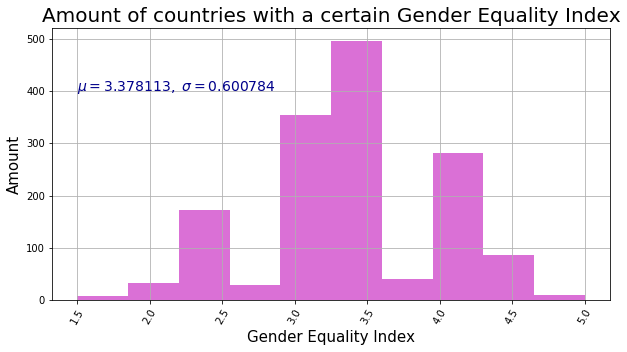

In [57]:
#Making a histogram
GEI_all['value'].hist(color = 'orchid', figsize=(10, 5))

#Giving the plot a title and labels, also setting the axes
plt.title("Amount of countries with a certain Gender Equality Index", fontsize = 20)
plt.xlabel('Gender Equality Index', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.xticks(fontsize = 10, rotation = 60)
plt.yticks(fontsize = 10)

mean = GEI_all['value'].mean() #Mean of the distribution
std = GEI_all['value'].std()   #Std of the distribution

plt.text(1.5, 400, r'$\mu= %f,\ \sigma=%f$' %(mean, std), fontsize=14, color='darkblue')

To take all countries in the world into account is a lot and would make this research paper to big. For that reason the decision was made to scope the problem and look at the most interesting countries, the countries who have to do the most to reach the goal of gender equality in 2030. Based on the GEI the 15 countries with the worst rating are selected. These countries will be analysed throughout the rest of this paper. 

These 15 countries with the lowest GEI, are combined in a data frame. This way, the same countries can be used for the other sub questions. Not all data is available for every country. There is some missing data in the dataset. The data missing is filled in with a general function "fillna". This function is described in paragraph 1.3 *General functions*.

In [17]:
#Filter the dataset on year and on country code which are not numeric
GEI_all_year_alpha = GEI_all.loc[(GEI_all['date'] == 2017) & (GEI_all.country_code.str.isalpha())]
GEI_OnlyCountries = GEI_all_year_alpha[17:]

#Sort the countries by 'value' (their rating) and only show the Top 15
GEI_worst15 = GEI_OnlyCountries.sort_values(by='value', ascending=True)[:15]
GEI_years15 = getYears15(GEI_all)

To conclude the general understanding of the GEI per country, for the 15 countries with the lowest GEI a line plot is made. This plot shows the a blue line for the mean of all countries, 3,4. The country is the thick line, the vague lines are the other 14 countries. 

7 out of 15 countries show a decreasing trend in GEI, 8 out of 15 countries show a stable trend over the years. The unknown data is filled in with the fill function. This is not really precise, most plots convert to the mean value.

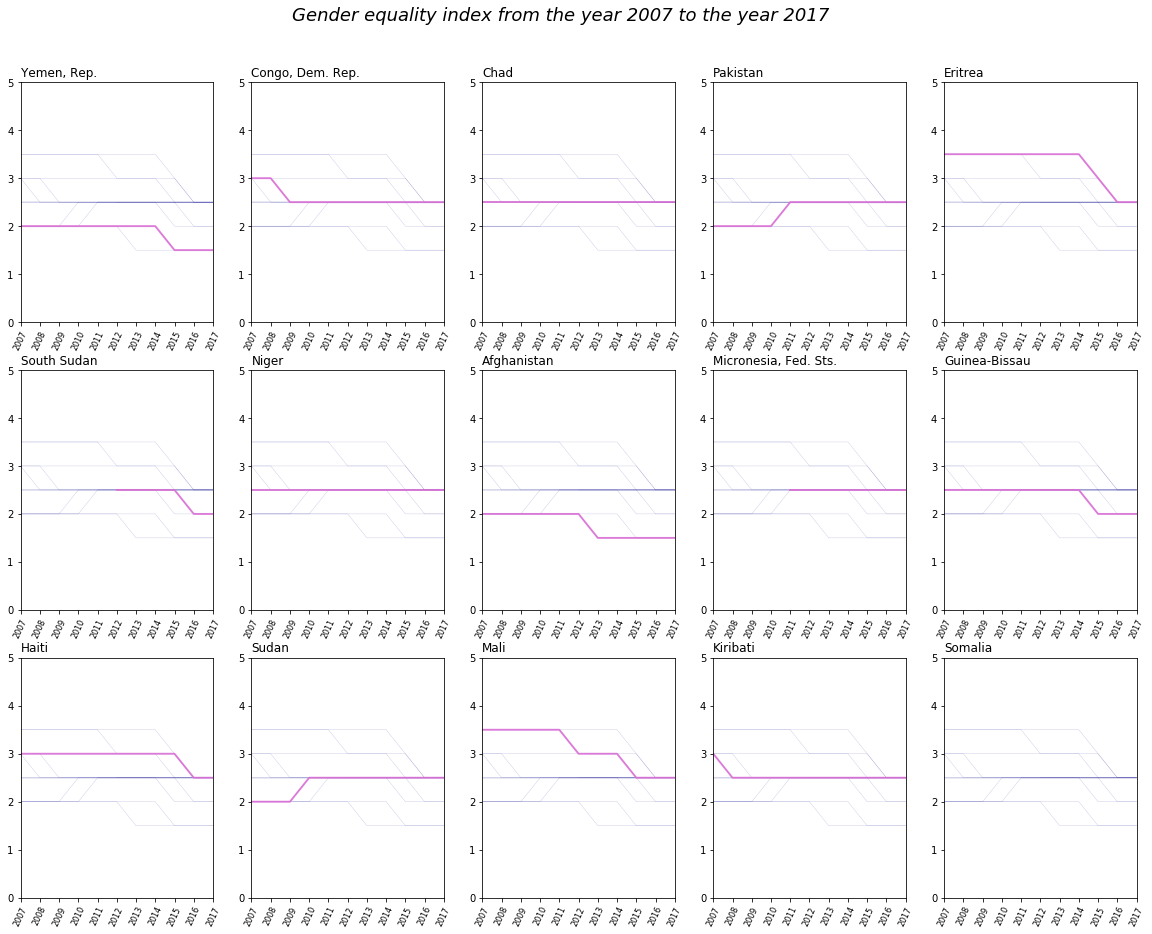

In [60]:
#Make multiple plots
multi_plot(GEI_years15)

# 3. What is the relation between Gross Domestic Product of a country and the Gender Equality Index?

In this chapter the relation between Gross Domestic Product (GDP) and the Gender Equality Index (GEI)will be discussed. An assumption broad accepted states that the economic welfare of a country has a big impact on social problems such as gender equality. If a country has a higher GDP, there is more to invest in the social growth of a country. Countries who need to focus on primary needs, will worry less about social problems such as gender equality. 

To check this assumption, the correlation between GDP and the GEI will be calculated through a regression analysis. How the regression analysis is computed, will be explained in paragraph 1.3 *Functions*. Before the regression is made, the available data is examined. A bar plot of the GDP of the 15 countries who scored lowest on the GEI is visualised per country. The function for making the bar plot is described in paragraph 1.4 *Graph functions*. Next the change in GDP over time in showed in a line graph. The function of the line graph is also described in paragraph 1.4 *Graph functions*. 

The data visualised in the different plots shows how the countries have developed over time. A feeling how the countries evolved will grow and insights for the future will be provided. If there is a correlation between two indicators, and the economy is flourishing, chances are the social problems will also become more priority. If there is not a correlation, growing economy will not lead to more gender equality.

### 3.1 Creating a data frame of the needed data

Before the plots can be created, the appropriate data need to be selected. The World Bank dataset provides a lot of sources and indicators. How these indicators and sources are chosen can be read in paragraph 1.2 *Data generation*. 

The "clean" and "fillna" function from paragraph 1.3 are used again to make a data frame from the Gross Domestic Product (GDP) data. Afterwards, a data frame with only the most recent data is created. This dataset is scaled to only the 15 countries with the lowest GEI.

Because the missing data in the World Bank data sets is filled in by the "fillna" function, there is a little uncertainty in the data. This need to be taken into account during reviewing the analysis. The overall conclusions will be reliable because it only counts for a few data points, but even it is for a few points it brings some uncertainty.


In [19]:
#Make a dataframe from the GDP data
GDP_all = clean("NY.GDP.PCAP.CD")
GDP_all = fillna(GDP_all)

In [21]:
#Make the value in the column "date" a string
GDP_all["date"] = GDP_all.date.astype(str)
GEI_worst15["date"] = GEI_worst15["date"].astype(str)

#Make a new dataframe of the 15 countries with the worst equality index in combination with the GDP data
GDP_worst15 = dataframe_worst15(GDP_all)

### 3.2 Gross Domestic Product of the 15 countries with the lowest Gender Equality Index

The bar plot is made by the function "makeBarPlot". This function is described in paragraph 1.4 *Graph functions*. The graph shows Gross Domestic Product (GDP) in US dollars per country. PPP stands for purchasing power parity. This means the value of all final goods and services produced within a country in a given year, divided by the average (or mid-year) population for the same year (Hall, 2018). 

The bar plot shows a with range of variety in GDP's. Most countries have a relatively low GDP. Two countries, Micronesia and Sudan, show a much higher GDP than the rest. Pakistan and Kribati are in the middle range. The other countries are low, with South Sudan and Niger at the bottom. 

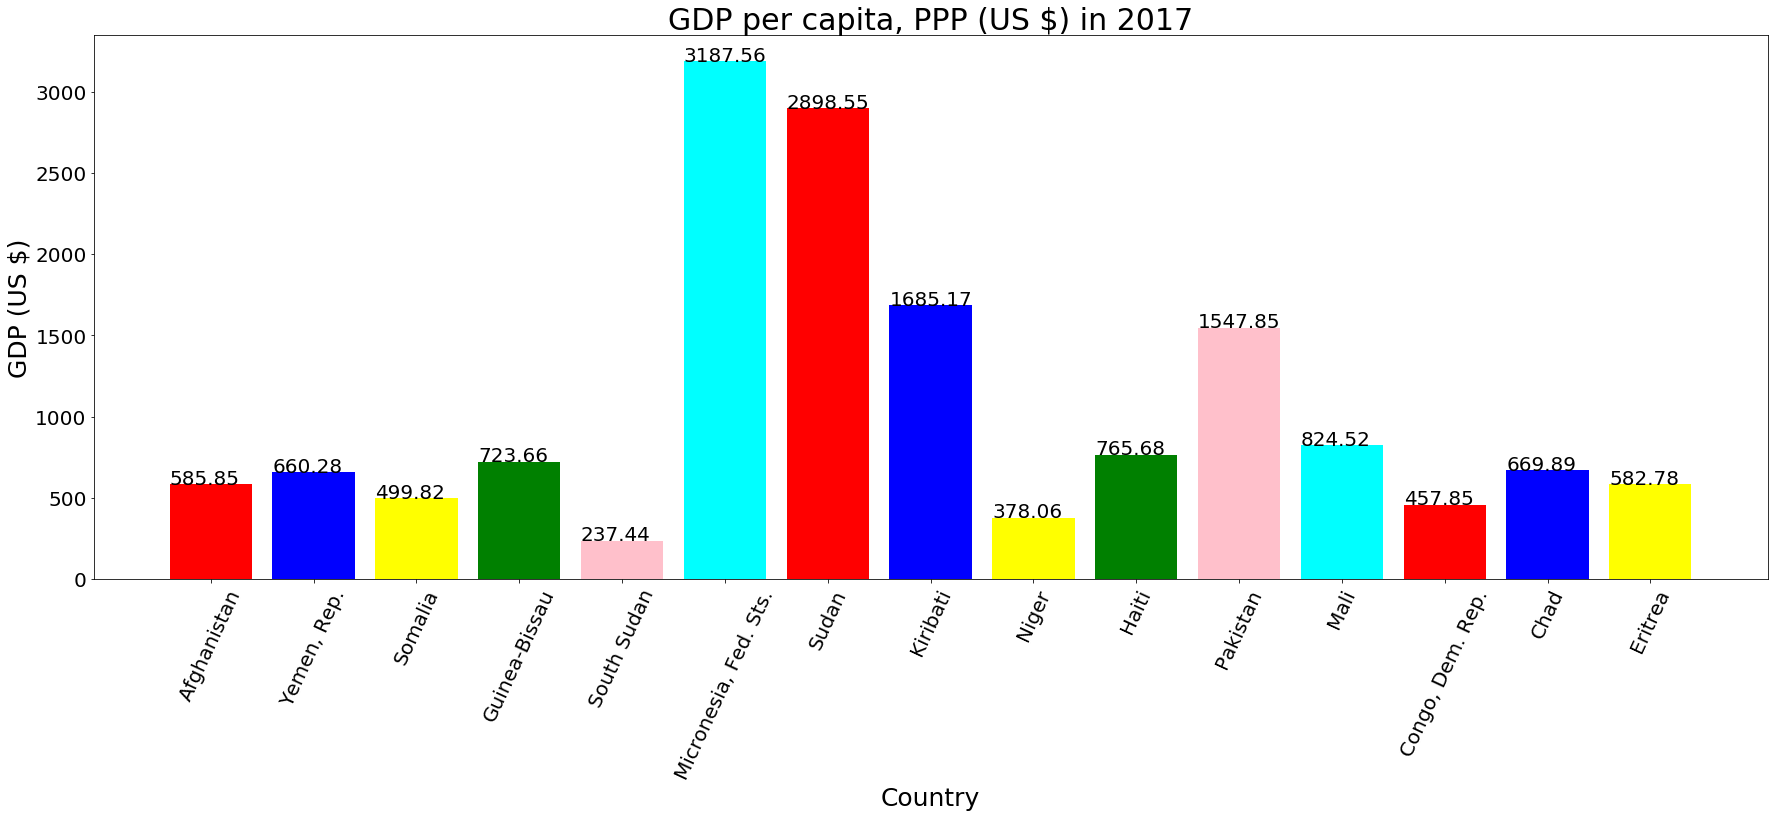

In [61]:
makeBarPlot(GDP_worst15['country'], GDP_worst15['value_y'], "GDP per capita, PPP (US $) in 2017", "Country", "GDP (US $)")

### 3.3 Change in Gross Domestic Product over the years of the 15 countries with the lowest Gender Equality Index

The change in Gross Domestic Product (GDP) is shown in a line plot. This plot is made by the function "getYears15". This function is explained in paragraph 1.3 *Functions*. Through this function a data frame is created for GDP per country about a certain time period. This time frame is 2007 till 2017. In a period of ten years the changes in GDP per country are more clear than in a short period of time. Over ten years it is more clear if a country has an increasing or decreasing GDP. This way assumptions about the future can be made. Supposed the trend shown in the graph will continue. If this trend already continues for ten year, the assumption it will continue is more plausible. The GDP is in US dollars per country. 

There are a lot of lines but the core messages of the plot are for most countries the GDP is stable. Around 2014 and 2015 the most countries had a decrease in GDP. This can be related to the financial crisis worldwide (Gandel, 2013). After 2014 most countries are slowly increasing their GDP again. Two countries show an odd graph, Haiti and South Sudan. Haiti’s GDP is severely impacted by the natural disasters that stroke the country since 2010 (Kenney, 2010). For South Sudan the economic performance is strongly depending on oil. The combination of the sharp drop in oil prices and the reduction in oil production followed by the ongoing civil war sharply reduced the GDP over the last years (African Development Bank, n.d.).

Micronesia and Chad are increasing the fastest. Chad started of relatively low but is now the second best of these countries. The economy is flourishing. Micronesia started relatively high and keeps growing. Other countries stay stable and show a little increase in GDP.


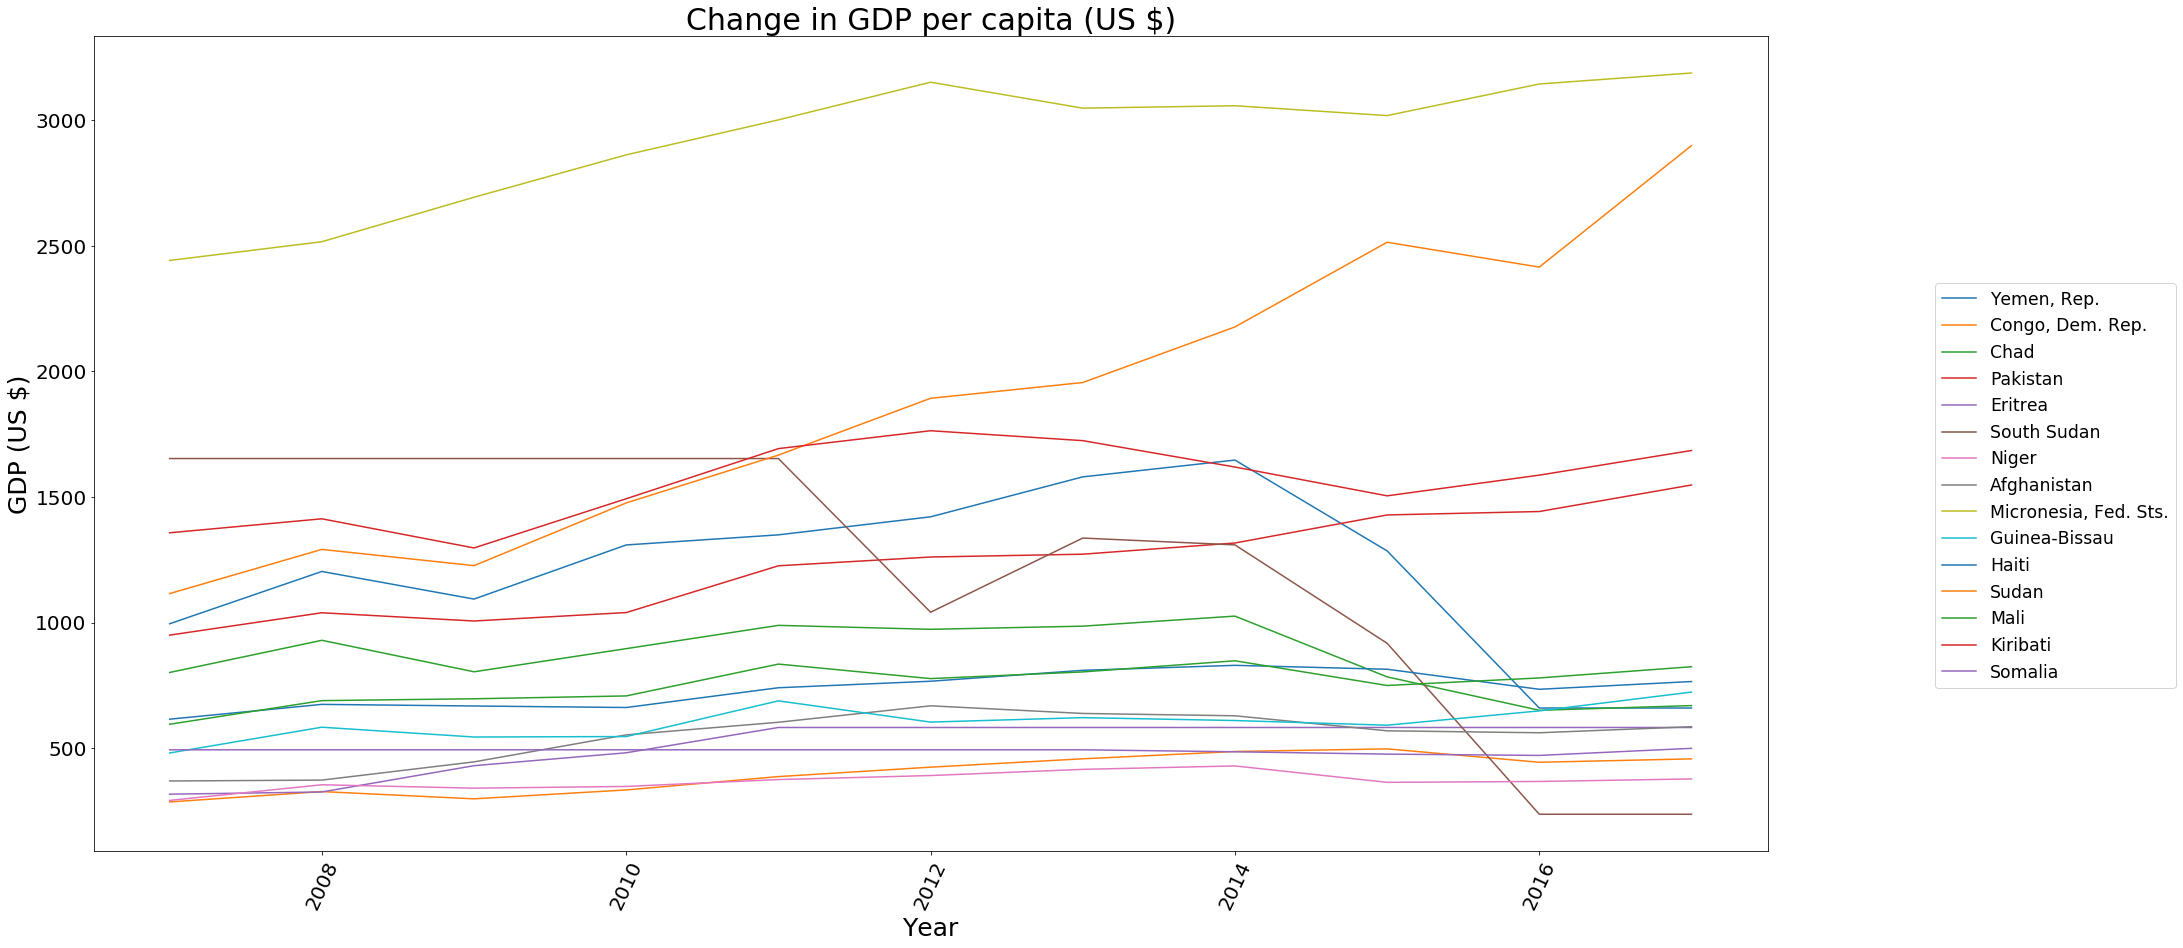

In [23]:
#Create the dataframe of the GDP of the 15 countries over the years 2007 till 2017
GDP_years = getYears15(GDP_all)

#Plot of the GDP over the years
graph(GDP_years, "Change in GDP per capita (US $)", "Year", "GDP (US $)")

### 3.4  The relation between Gross Domestic Product and the Gender Equality Index

The Gross Domestic Product (GDP) per country is evaluated over a range of time and the countries are compared with their current GDP. Now the general view on the GDP of the 15 countries with the lowest score on the Gender Equality Index (GEI) is formed, the relation between the GDP and the GEI can be established. GDP is shown in US dollars.

The regression is computed with the regression function and a scatterplot. The function "regression" is used, this function is defined in paragraph 1.3 *Functions*. In a scatterplot the dots are the data of the countries. They have a value for GDP and for the GEI, at the point where these values cross each other the dot is placed. The line shows where the most point centre around, it shows the mean. If most dots are around the line, a relation can be assumed. 

In the scatterplot, a clear concentration of dots around the line can be established. There are a few outliers in the upper right corner of the graph. Keeping the graphs of the earlier paragraphs in mind, these probably are from Micronesia, Sudan, Kribati and Pakistan.

The regression analysis confirmed there is a relation between GDP and GEI.


The slope is 1848.2750002268397, the intercept gives -3107.0452863623154
The Pearson correlation coefficient is 0.2510833467783031 and with the p-value estimated at 3.849039830788414e-23, and thus smaller than 0.05, which means that the correlation coefficient is significant.

The function for this regression would be: Gender Equality Index = -3107.0452863623154 + 1848.2750002268397 * GDP (US $)


,slope,intercept,R^squared,p-value,std. error
0,1848.275,-3107.045286,0.063043,3.849040e-23,183.488088


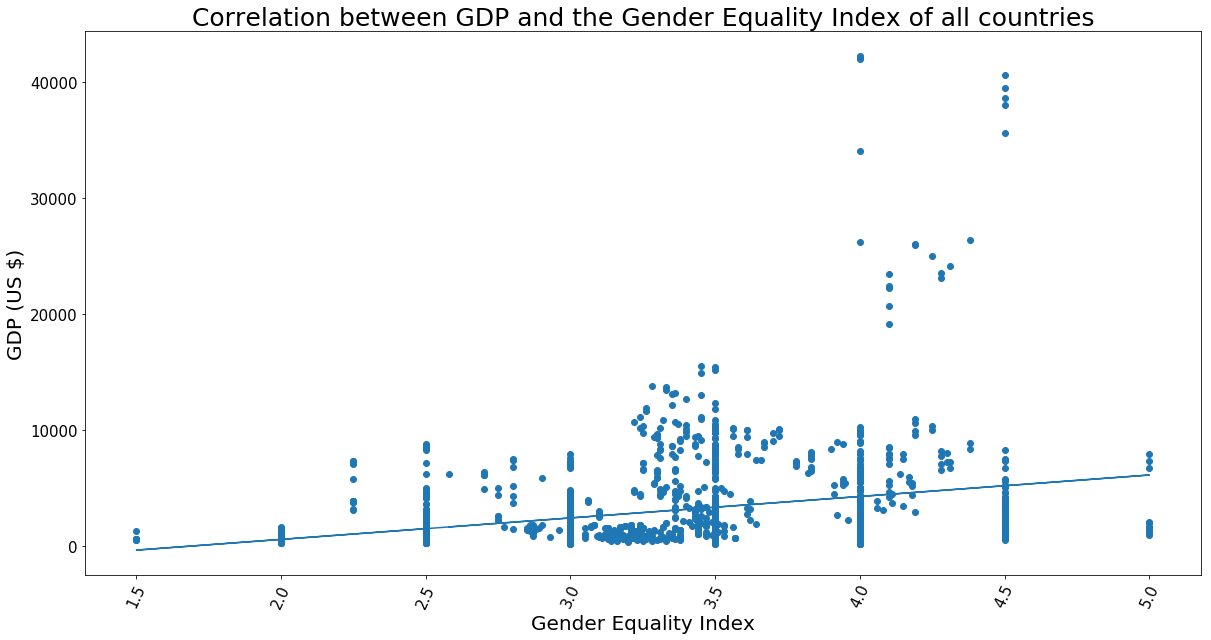

In [25]:
regression(GEI_all,GDP_all,"Correlation between GDP and the Gender Equality Index of all countries", 'Gender Equality Index', "GDP (US $)")

### 3.5 Conclusion

In this chapter the Gross Domestic Product (GDP) of the 15 countries with the lowest Gender Equality Index (GEI) is analysed. First the countries are compared in the same year, 2017. Here, a difference in GDP is clearly visible. However, most of the countries have a relatively low GDP.

Next the GDP per country is visualised over a period of ten years. For most countries there was not a big increase in GDP over the years, the GDP increased a little but stayed mostly stable. Around 2014 and 2015 a drop in GDP was visible for all the countries, due to worldwide economic crisis. A few countries showed a clear increase in GDP. Micronesia was in both plots a high outlier. The economy is clearly flourishing, but they are still with the 15 countries that have the lowest GEI. This country is an exception on the assumption of correlation between GDP and gender equality.

Last the correlation is analysed. This plot shows that there is a significant relation between GDP and GEI. This confirms the assumption made in the beginning of this chapter.


# 4. What are the inequalities in education between men and women?

In this chapter the difference between women and men in education is evaluated. assuming men have more access to education than women. Women who marry young, have to leave school early. Also parents don't see the use for girls to get education because they need to stay home and take care of the children and the family. Men need to earn the money and provide financial care for his family. For men education is of greater importance.

To test this assumption, multiple indicators will be examined. These indicators are selected from the sources of the World Bank database. How this indicators are selected, is explained in paragraph 1.2 *Data generation*. First a data frame per indicator is created, the clean function is used again. The explanation of this function can be found in paragraph 1.3 *General functions*.


In [26]:
# Make a dataframe from the indicators data
Primary_School_Male = clean ('SE.PRM.NENR.MA')
Primary_School_Female = clean ('SE.PRM.NENR.FE')
Secondary_School_Male = clean ('SE.SEC.NENR.MA')
Secondary_School_Female = clean ('SE.SEC.NENR.FE')

Primary_School_Male = fillna(Primary_School_Male)
Primary_School_Female = fillna(Primary_School_Female)
Secondary_School_Male = fillna(Secondary_School_Male)
Secondary_School_Female = fillna(Secondary_School_Female)

### 4.1 Difference in primary school enrolment and secondary school enrolment between men and women

Starting, the difference between sex in enrolment in primary school is visualised. This is done by making a stacked bar plot. The percentage goes up to 200% because there is 100% for the women and 100% for the men in the datasets. The difference can be seen by the size of the bars. If the bar of women is smaller than of men, the conclusion is for that specific country, that men have more education enrolment than women.

To make these plots, a data frame with the appropriate data is created. One data frame for men enrolment in primary school, one for women. The same is done for secondary school.

After the data frame is created, only the data of the 15 countries with the lowest Gender Equality Index (GEI) is needed. The data frames are merged with the data frame of the 15 countries, so only the needed data is in the data frame. This is done for primary school as well as secondary school. Both are split for men and women. These data frames are created by the function "prepStackPlot". 

In [27]:
#Function to prepare the dataframe for the stackplot
def prepareStackPlot(dataframe):
    name = dataframe.loc[dataframe['value'] >= 0]
    name2 = name.sort_values('date', ascending = False).drop_duplicates(['country']) #Only most recent year will be added in the dataframe
    name2['date'] = name2.date.astype(str)
    name3 = pd.merge(GEI_worst15, name2, how = 'left', left_on = ['country'], right_on = ['country'])
    
    return name3

In [29]:
# Primary school enrollment
PSM15_worst15 = prepareStackPlot(Primary_School_Male)
PSF15_worst15 = prepareStackPlot(Primary_School_Female)

# Secondary school enrollment
SSM15_worst15 = prepareStackPlot(Secondary_School_Male)
SSF15_worst15 = prepareStackPlot(Secondary_School_Female)

After the data frames are created, the stacked bar plot will visualise the data for the 15 countries with the lowest GEI. This is done both for primary school and secondary school, both for the year 2017. 

Looking at the stack plot of primary school, the positive conclusion is, all countries have women and men in primary school. Kribati has 200% of enrolment in primary school, this means that all people are enrolled in primary school. For most countries the plot for men and women looks relatively even. Afghanistan, Somalia and South Sudan have a clear inequality in men and women. Also these countries have general low enrolment percentage, for women this is even less.

10 out of the 15 countries have more than half of the population enrolled in primary school, this is a relatively positive conclusion. 

Looking at the stack plot of secondary school, the enrolment per country is much less than for primary school. Learning is not stimulated because after primary school children have to work or help in household to help providing for the family. Kiribati is again an exception, they have 140% enrolment in secondary school and men and women are almost even distributed. 

Seen from the plot, men have a much higher enrolment rate in secondary school than women. Three countries have zero enrolment in secondary school according to the database of the World Bank. One odd result is the stack plot of Afghanistan, they have a higher enrolment percentage for secondary school than for primary school. This indicates that most of the children go to secondary school after primary school.

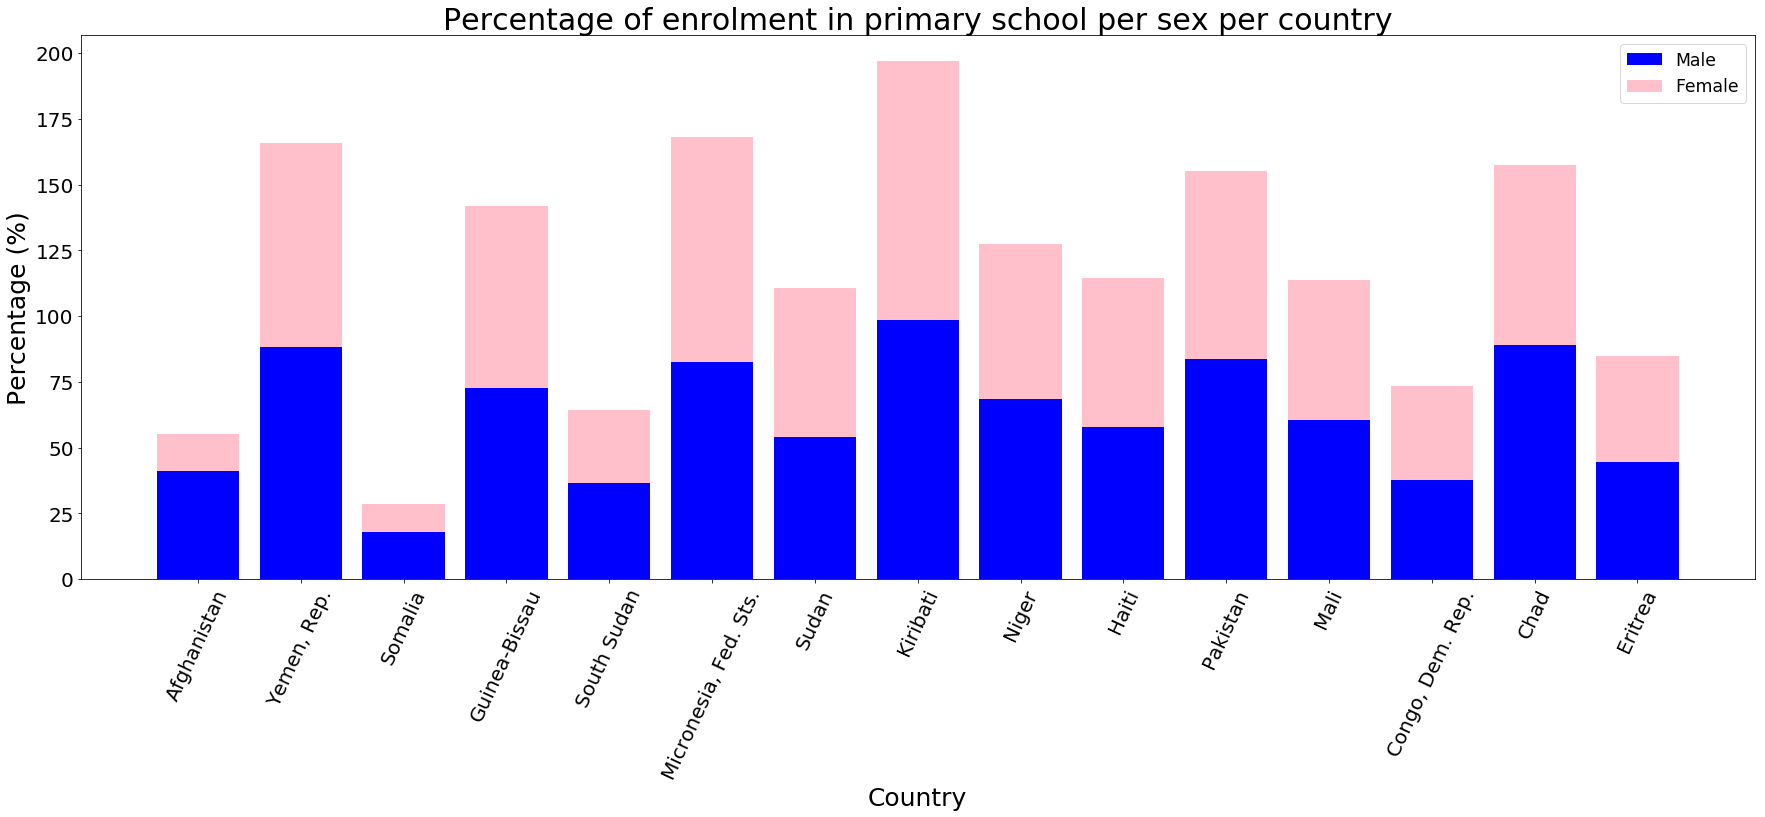

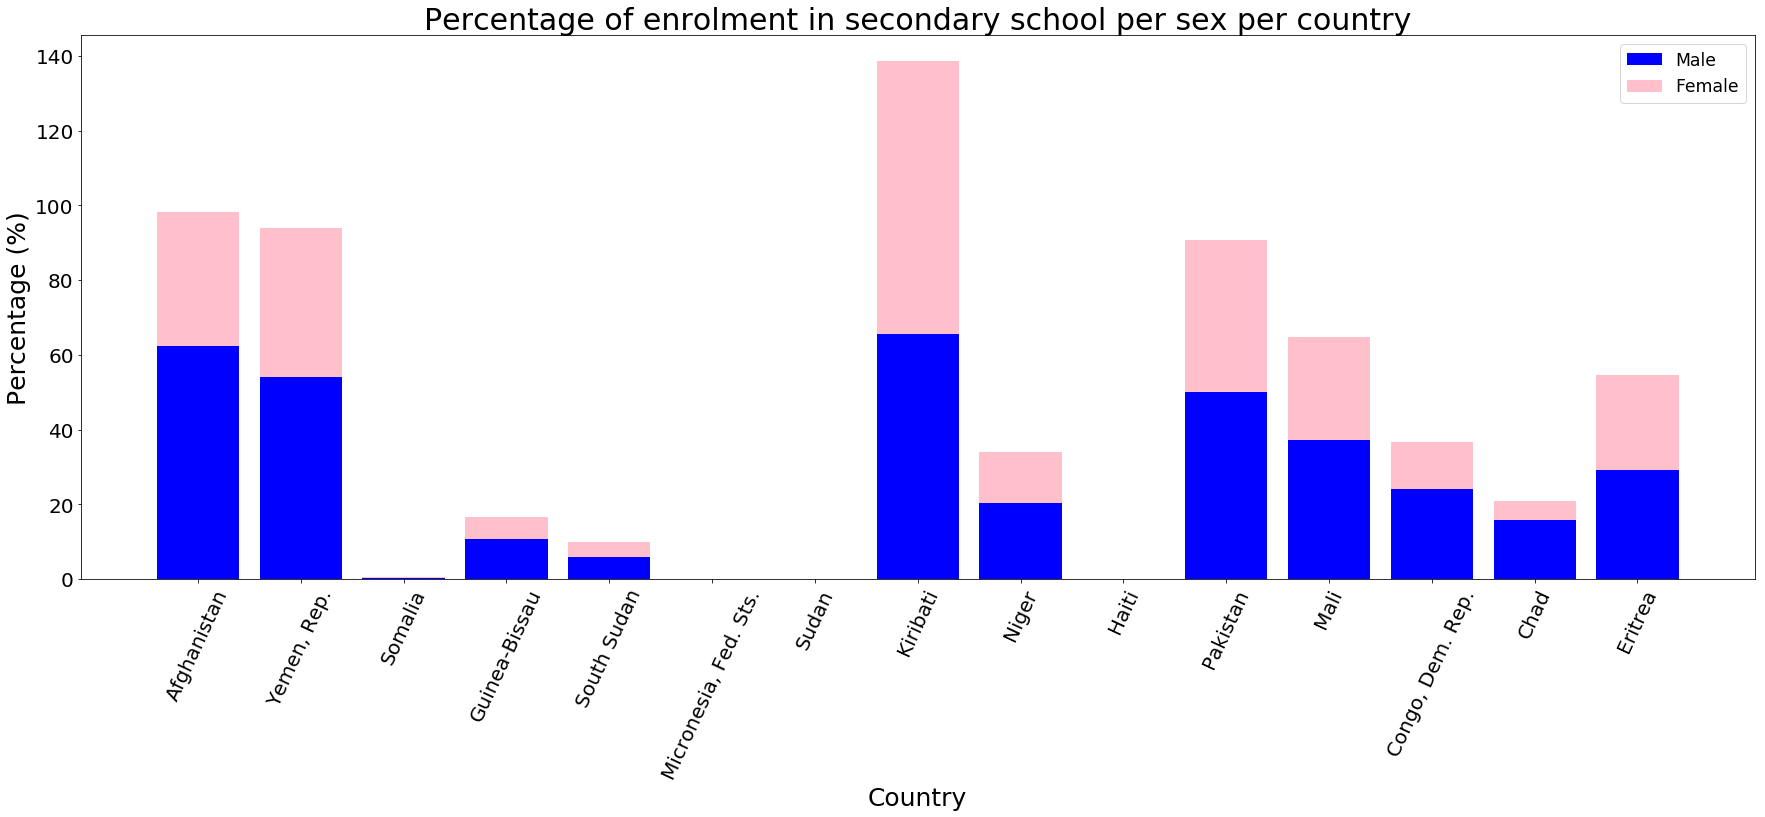

In [62]:
makeStackedBarPlot (PSM15_worst15, PSF15_worst15,"Percentage of enrolment in primary school per sex per country", 
                    'Country', 'Percentage (%)')
makeStackedBarPlot (SSM15_worst15, SSF15_worst15,"Percentage of enrolment in secondary school per sex per country", 
                    'Country', 'Percentage (%)')

### 4.2 Difference in completion rate of primary school between men and women

In the previous paragraph the enrolment in primary and secondary school is discussed. This plot showed for all of the 15 countries with the lowest Gender Equality Index (GEI), there was enrolment in primary school. In this paragraph the completion rate of primary school is discussed. A lot of women start primary school but never finish it, this is an important indicator for comparing men and women. It shows how many of the enrolled children get the change to actually finish primary school.

To increase the chances of a better life, finishing education is an important indicator. Girls get more chances in life through education, otherwise they're forced to become young mothers and stay home with the children.


In [33]:
Complete_PrimSchool_Male = clean ('SE.PRM.CMPT.MA.ZS')
Complete_PrimSchool_Female = clean ('SE.PRM.CMPT.FE.ZS')

Complete_PrimSchool_Male = fillna(Complete_PrimSchool_Male)
Complete_PrimSchool_Female = fillna(Complete_PrimSchool_Female)

The bar stack plot will show the rate of women and men above each other. When the bar reach 200%, all men and women enrolled in primary school also completed primary school. Again, Kribati scores 200%, all children staring education do also finish. 

In Somalia and South Sudan none (or very little) of the children enrolled in primary school actually finish school. In contrary with the previous paragraph the division between men and women is clearly visible. A much higher percentage of men finished primary school than women. Also 8 out of 15 countries score below 100% meaning not even half of the population enrolled in primary school will finish. That is a disturbing conclusion.


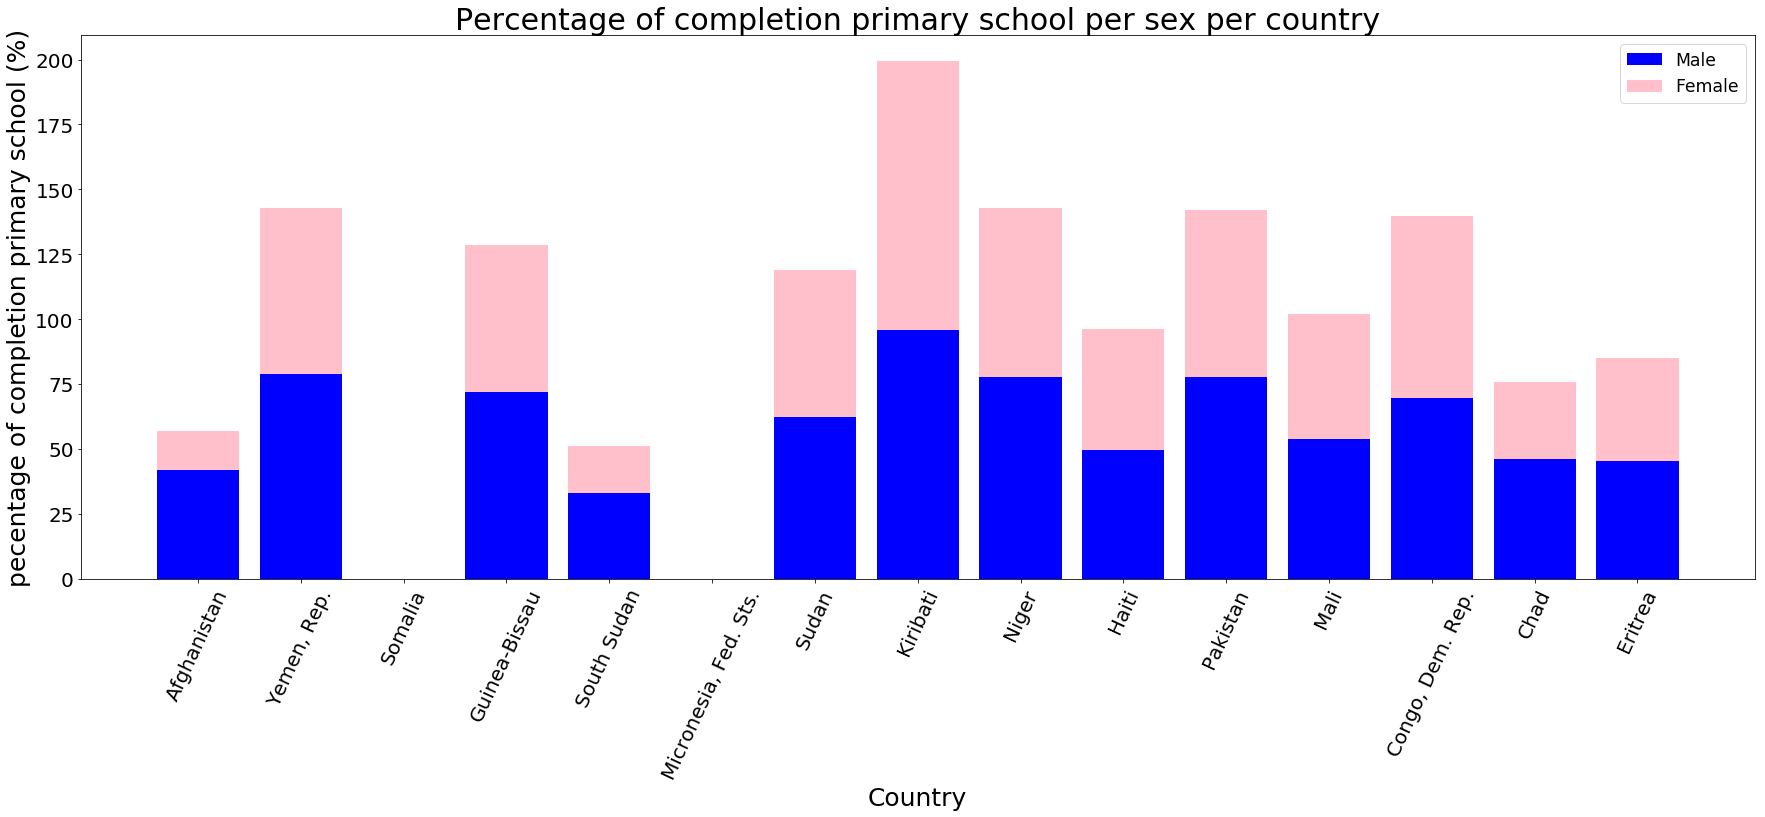

In [63]:
#Prepare the dataframe for the stackplot. Get the 15 countries with the lowest GEI for the year 2017
CPM15_worst15 = prepareStackPlot(Complete_PrimSchool_Male)
CPF15_worst15 = prepareStackPlot(Complete_PrimSchool_Female)

#Make a stackplot
makeStackedBarPlot (CPM15_worst15, CPF15_worst15,"Percentage of completion primary school per sex per country", 
                    'Country', 'pecentage of completion primary school (%)')

### 4.3 Difference in literacy rate between men and women

The literacy rate shows the percentage of a country who can read. This indicator is again split to men and women. If women have finished primary school they have learned how to read. Assumption made on the previous paragraphs is the literacy rate of women is lower than for men. This indicator is plot on the 15 countries with the lowest Gender Equality Index (GEI).

In [38]:
Literacy_Rate_Male = clean ('SE.ADT.LITR.MA.ZS')
Literacy_Rate_Female = clean ('SE.ADT.LITR.FE.ZS')

Literacy_Rate_Male = fillna(Literacy_Rate_Male)
Literacy_Rate_Female = fillna(Literacy_Rate_Female)

The stack plot beneath counts till 200%, again this is 100% for women and 100% for men. If the bar reaches 200% everyone in the country can read.

From the stacked bar plot turned out that Congo scores best. 175% of the population can read. Almost 100% of the men and about 75% of the women. Notable from the plot is that literacy rate is equal distributed for most countries. This assumes women teach themselves how to read or learn it outside school. 

A positive conclusion that can be drawn from the plot is 7 out of 15 countries have a literacy rate above 100% so more than half of the population can read.

There are a few odd conclusions, such as for Kribati. None of the population can read, but almost everybody finished primary school and a lot of the people went to secondary school. This is probably a flaw in the data. For Somalia and South-Sudan it is more possible that the literacy rate is really low.


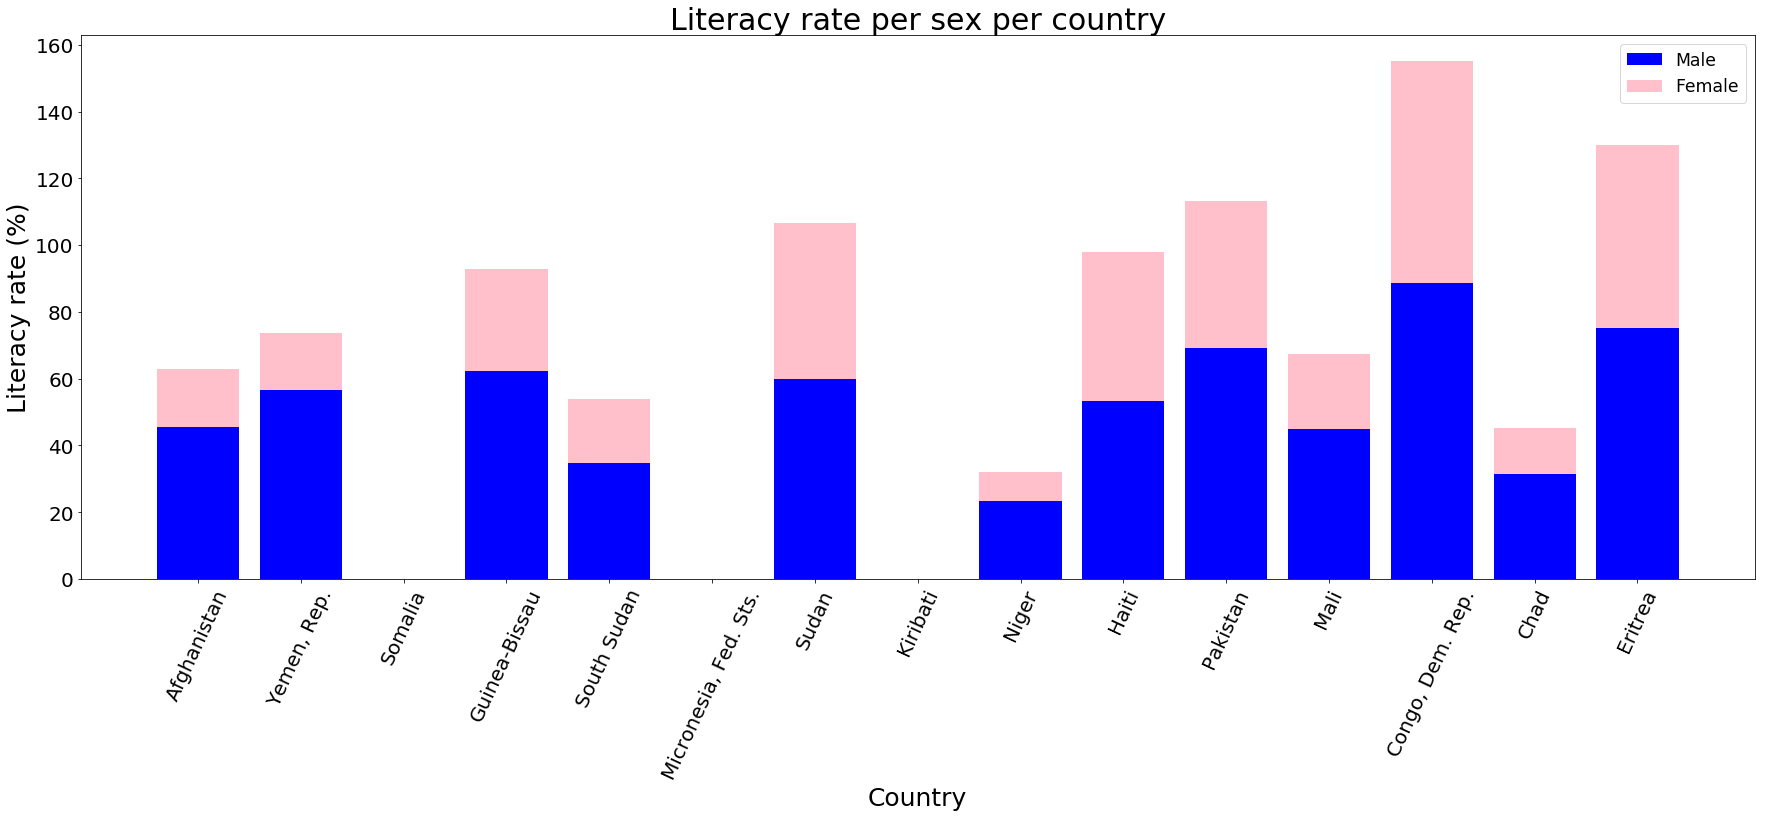

In [64]:
# Prepare the dataframe for the stackplot function
LRM15_worst15 = prepareStackPlot(Literacy_Rate_Male)
LRF15_worst15 = prepareStackPlot(Literacy_Rate_Female)

# Make a stackplot
makeStackedBarPlot (LRM15_worst15, LRF15_worst15,"Literacy rate per sex per country", 'Country', 'Literacy rate (%)')

### 4.4 Conclusion

To check the assumption of inequality in education between men and women, multiple indicators are compared. First the enrolment in primary school and secondary school are compared. In primary school the enrolment between men and women is in most countries relatively equal distributed with slightly more men than women. For secondary school the distribution is less equal. Clearly more men than women get the chance of enrolment in secondary school.

Next, the percentage of completion for primary school is analysed, also in this indicator an inequality is seen. Less women than men have completed primary school. From this analysis it turn out that women are withdrawal from school at some point in the education. 

Last, the literacy rate is compared. This data is a bit unreliably compared to the results of the previous indicators. But is does show a mostly equal divided literacy rate. About the same amount of women and men can read. From this the conclusion can be drawn that women learn to read outside school. They teach themselves or each other.

Concluded, there is a little inequality in enrolment for primary school. However, when looking at the completion rate of primary school the inequality is clearly visible. For secondary school there is also a clear inequality, women do however teach themselves how to read because literacy rate is divided more equally.


# 5. Is there a difference in health between men and woman?

In this chapter the topic health will be discussed. Assuming there isn't enough appropriate care for women. This is hard to analyse because it can't be compared with men. There were no indicators to analyse this assumption. The decision is made to compare the health of women and men in general by comparing the survival rate of men and women to 65 years. 

First the data frames for the needed indicators are created. The "clean" and "fillna" function is used for preparing these data frames. The description of these functions can be found in paragraph 1.3 *Functions*.


In [40]:
# Creating the data frames
Survival65_Male = clean("SP.DYN.TO65.MA.ZS")
Survival65_Female = clean("SP.DYN.TO65.FE.ZS")

Survival65_Male = fillna(Survival65_Male)
Survival65_Female = fillna(Survival65_Female)

# Add a column to the dataframe which contains the gender
Survival65_Male['Gender'] = "Male"
Survival65_Female['Gender'] = 'Female'

### 5.1 Difference in the survival rate to 65 year of women and men

To evaluate the differences in health between men and women, the survival rate to 65 year is compared. This indicator has data about the percentage of a country whom survived to 65 years. Assuming, if there is inequality in healthcare, women will die younger than men. The survival rate to 65 of women should be lower than for men.

First the data frames are created.


In [41]:
#Set the values in the column date to strings
Survival65_Male["date"] = Survival65_Male.date.astype(str)
Survival65_Female['date'] = Survival65_Female.date.astype(str)
GEI_worst15["date"] = GEI_worst15["date"].astype(str)

#Get a dataframe which contains only the 15 worst countries of the year 2017
S65M_worst15 = dataframe_worst15(Survival65_Male)
S65F_worst15 = dataframe_worst15(Survival65_Female)

#Merge the two dataframes together
Survival65_worst15 = pd.concat([S65M_worst15, S65F_worst15])

To compare the rate between men and women, a bar plot for every country is created. This not only shows the difference between men and women but also the difference between countries. 

From this bar plot the conclusion can be drawn that in all countries more women become 65 than men. Also most countries have a relatively high survival rate. 

Chad is an outlier with less than 50% of the men and women became 65 years. Micronesia has again the highest survival rate. In Kribati the difference between the survival rate of men and women is the biggest.


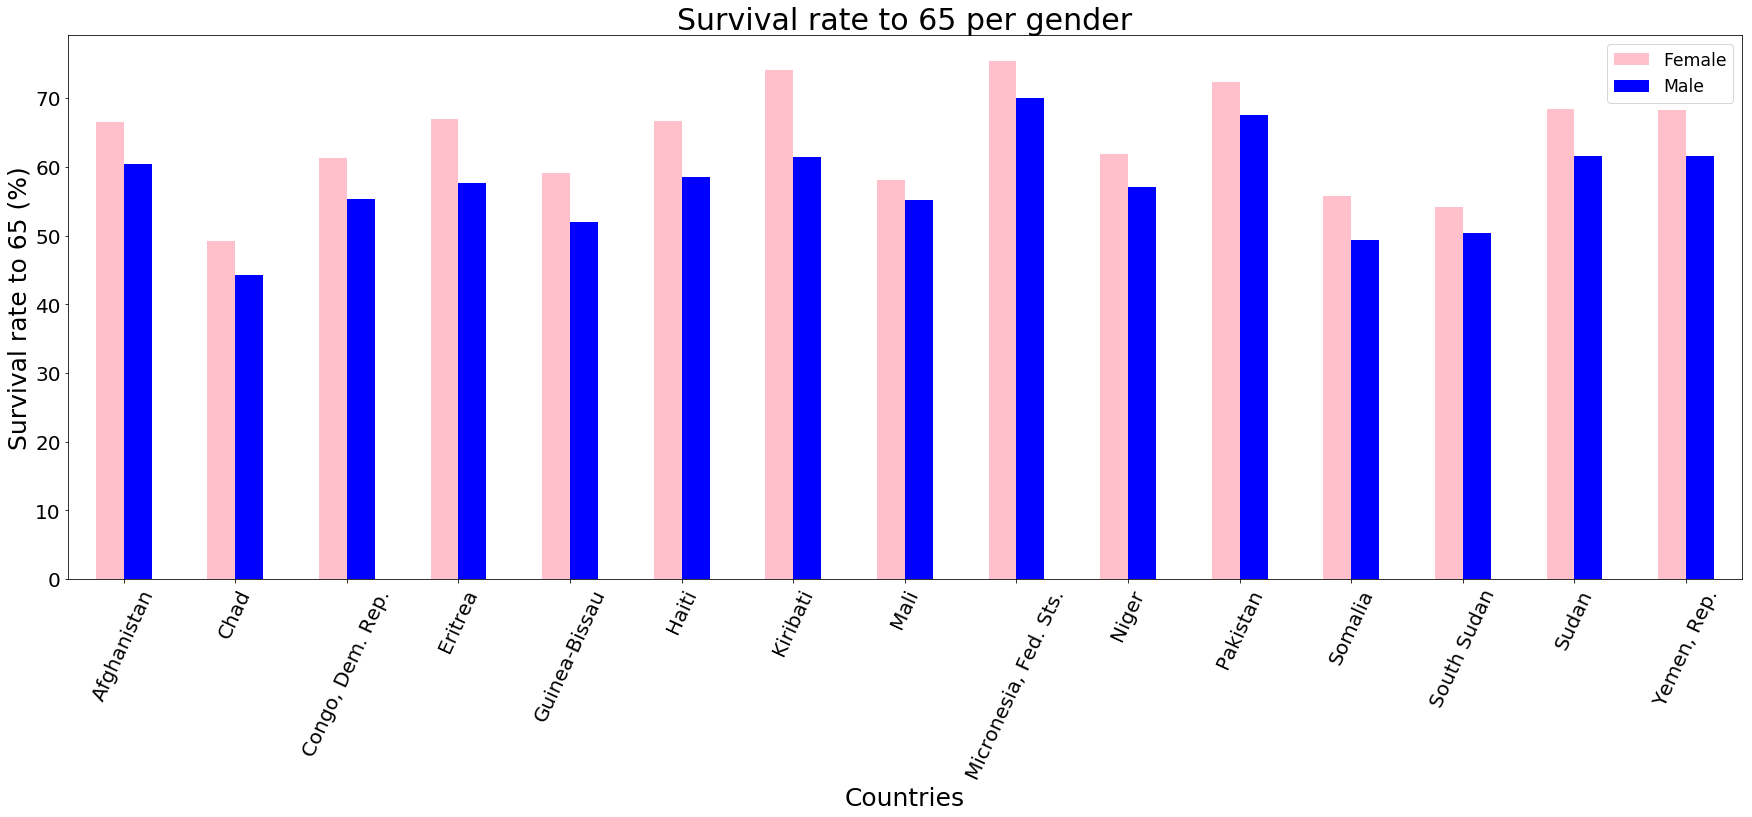

In [42]:
#Function to create a bar plot where the difference between the values between Males and Females can be visualized.
def TwoBarPlot(merged, title = '', xlabel = '', ylabel = ''):
    merged.pivot(index = "country", columns = "Gender", values = "value_y").plot.bar(color = ['pink', 'blue'], 
                                                                                 figsize = (30,10), fontsize = 20)

    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #Labels
    plt.title(title, fontsize = 30)
    plt.xlabel(xlabel, fontsize = 25)
    plt.ylabel(ylabel, fontsize = 25)

    plt.legend(fontsize = 'xx-large')

#Make the plot    
TwoBarPlot(Survival65_worst15, "Survival rate to 65 per gender", "Countries", 'Survival rate to 65 (%)')

### 5.2 Change in the survival rate to 65 over the years of the 15 countries with the lowest Gender Equality Index

From the previous chapter it turned out that for the year 2017, the survival rate to 65 year was relatively high. The women had a higher survival rate than the men. Interesting is to see how the survival rate evolved over time. To show this, two line plots are created. One for men and one for women. 

First, new data frames are created. This to not only get the value of 2017 but get a range of values. This range is over 10 years. This gives an image how the rate changed over time.

From the plots can be seen that the survival rate is increasing over the years and stabilising the last years. Despite that women have a higher survival rate than men, the order of the countries is almost the same. Micronesia has the highest survival rate over all the years. Mali has a relatively low survival rate.

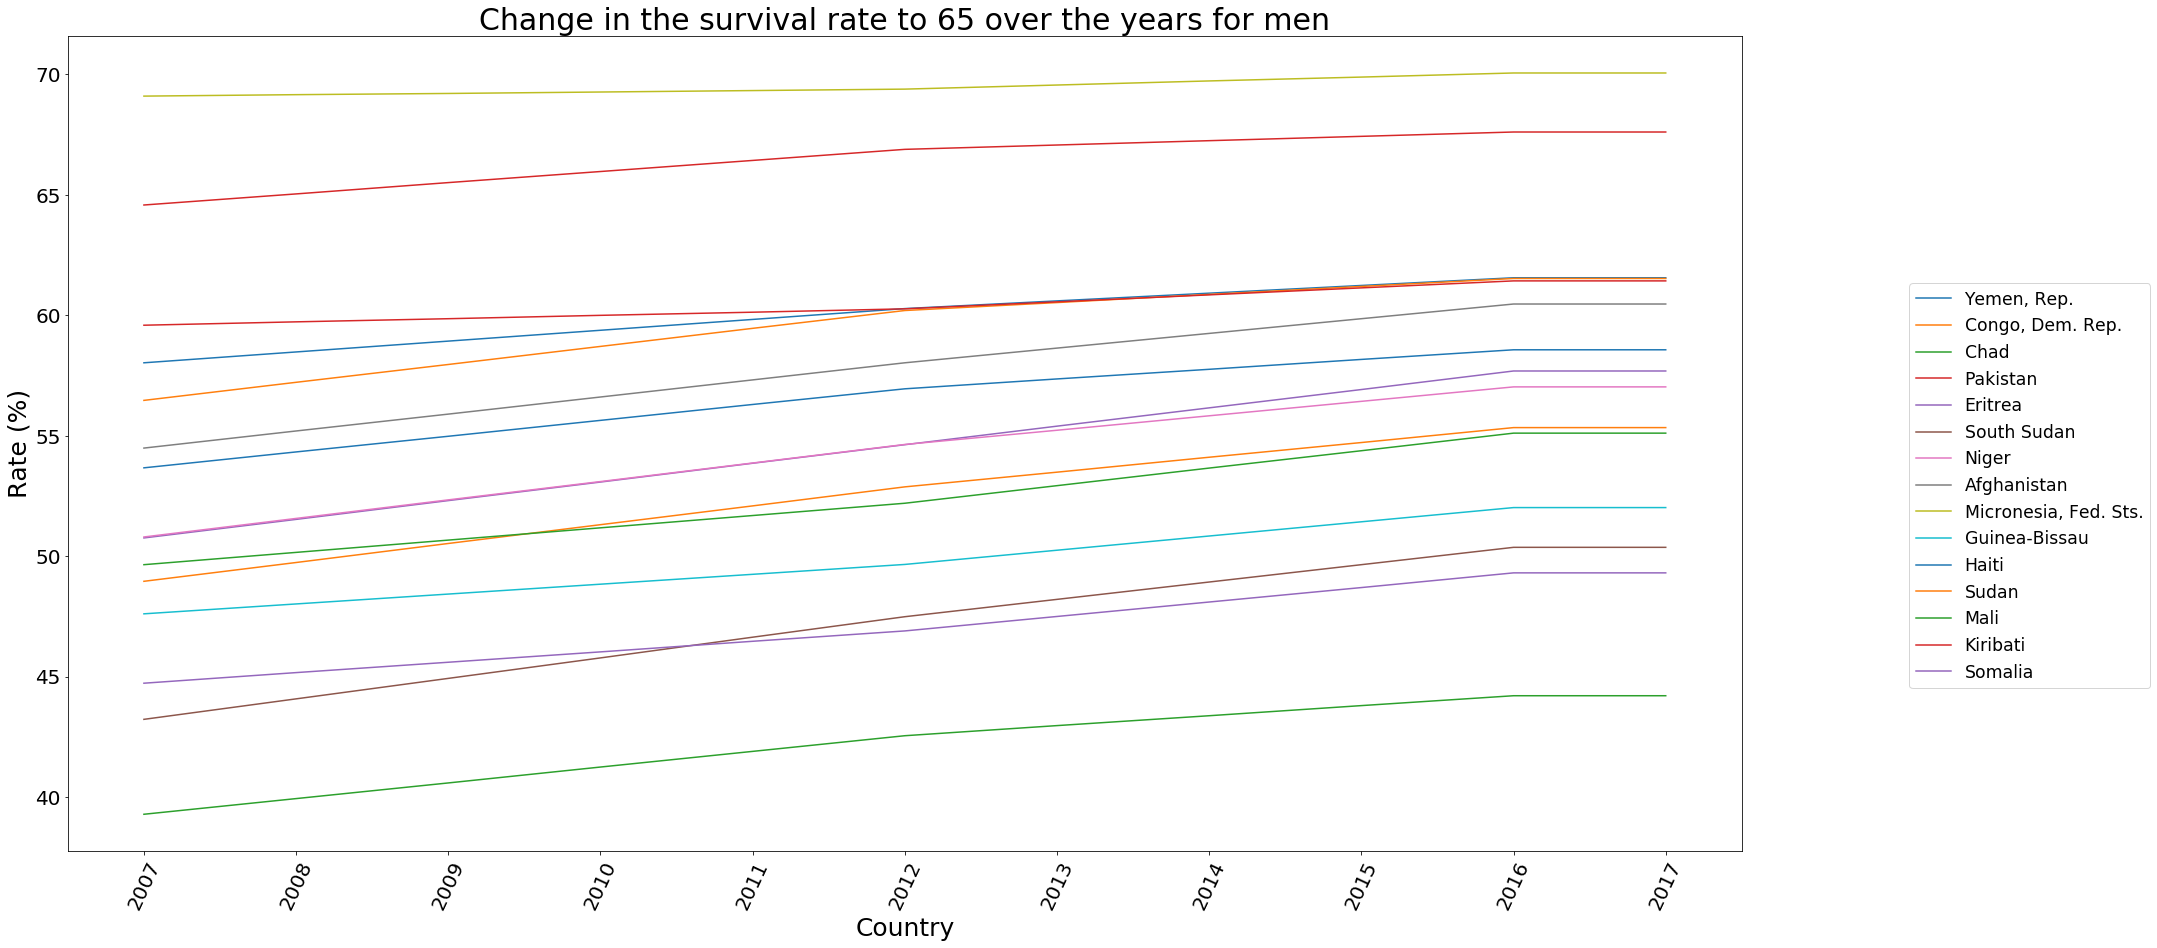

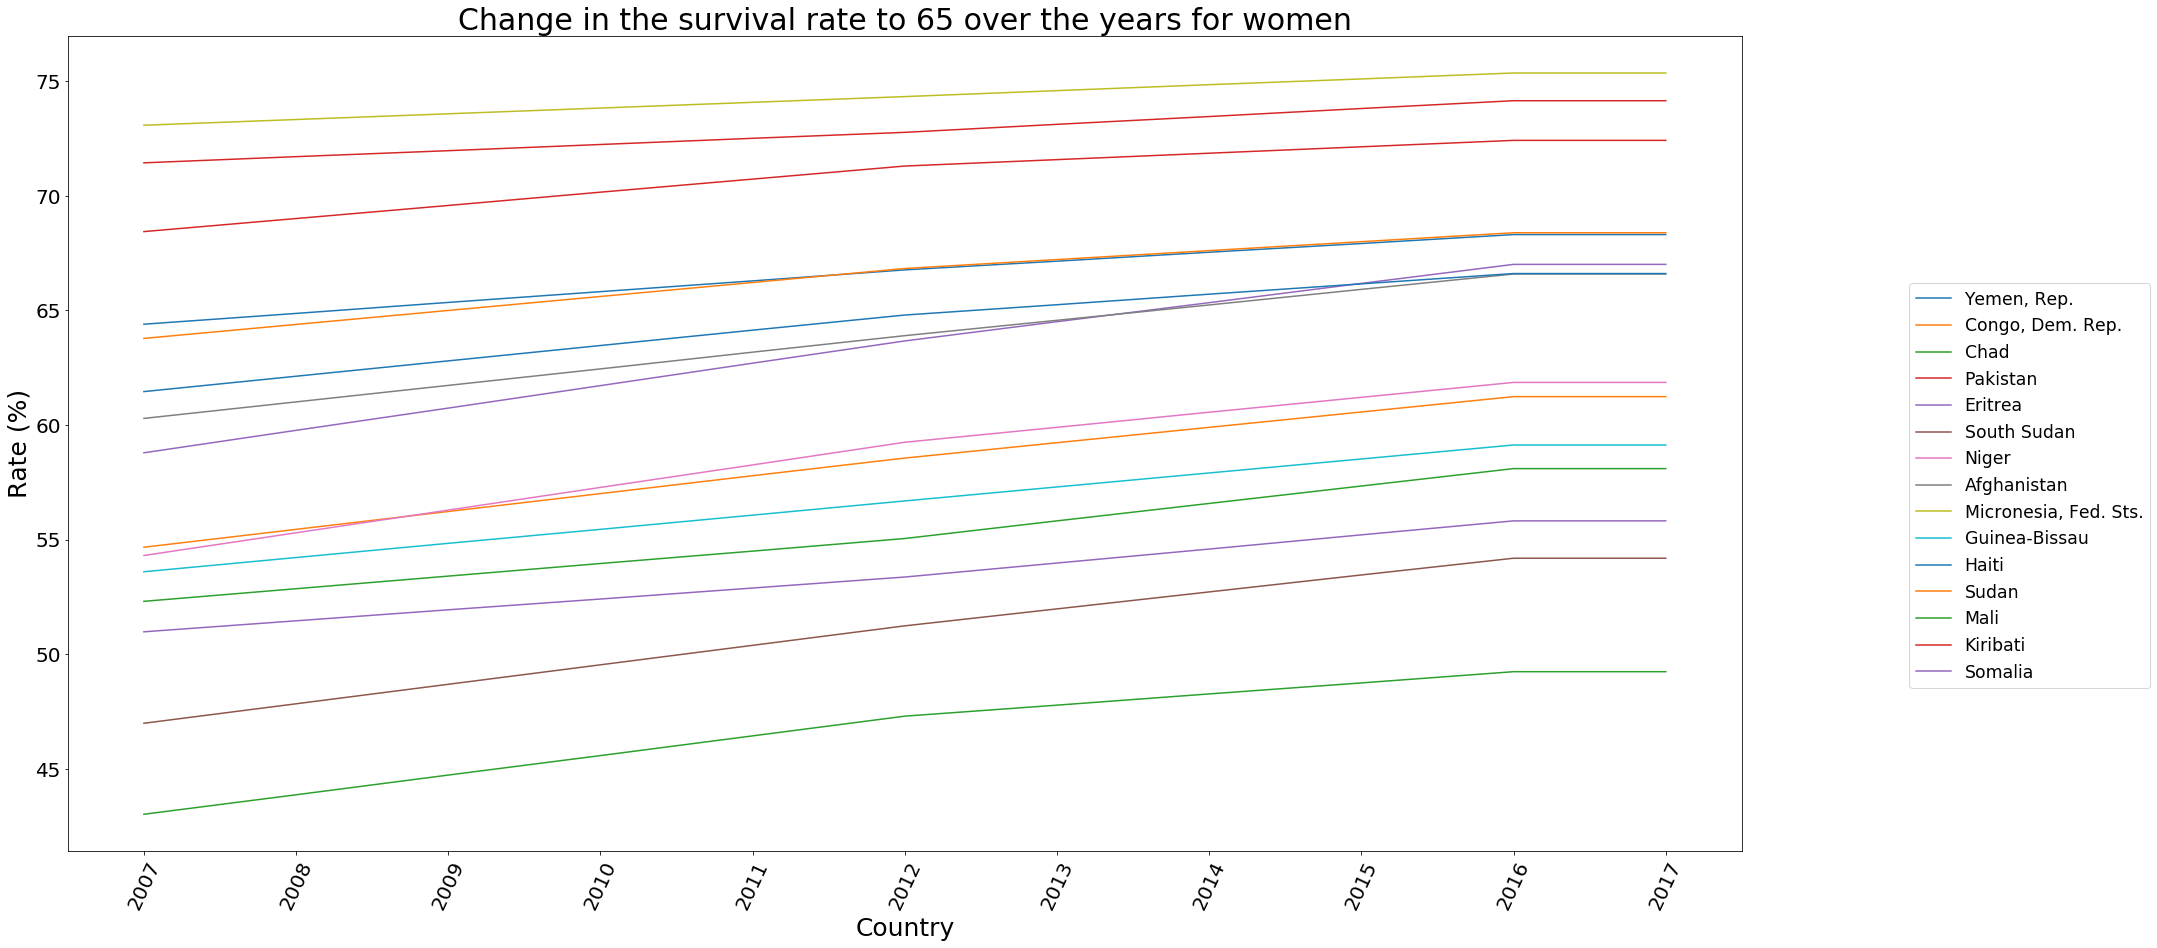

In [74]:
#Two separate graphs in order to visualise the change in survival rate to 65 over the years
S65M_years = getYears15(Survival65_Male)
S65F_years = getYears15(Survival65_Female)
S65M_years['date'] = S65M_years.date.astype(str)
S65F_years['date'] = S65F_years.date.astype(str)

#Call function to make a graph
graph(S65M_years, 'Change in the survival rate to 65 over the years for men', 'Country', 'Rate (%)')
graph(S65F_years, 'Change in the survival rate to 65 over the years for women', 'Country', 'Rate (%)')

### 5.3 Conclusion

From this chapter it turned out that women are healthier than men. Women have a higher survival to 65 rate than men in all the countries. Interesting is that man as well as women have a relatively high survival rate to 65 years.

From the second chapter can be concluded that the survival rate to 65 years increased over time. The last few years the rate stabilised. All the countries show the same increase in survival rate. However, a large difference between the countries survival rate can be seen. Also women have a higher survival rate than men. The countries with the lowest and highest survival rate by man and women are the same.

Survival rate is not a good indicator to show the inequality in healthcare for women.


# 6. What is the influence of child marriage on gender equality?

For this chapter, child marriage itself is analysed. As indicator the rate of girls who are first married at the age of 15 and are now between 20-24 year is chosen. This indicator shows how many girls per country still have to marry while being a child. Mostly these marriages are forced from their family because the family struggles to provide for all the children. The younger a child leaves the house to start a family for her own, the less people the family has to provide for. It's an financial decision. The assumption for this sub question is that ending child marriage has a lot of influence on gender equality. Because the other sub-questions show a inequality and literature research has proven that these factors will improve if child marriage would end.

Because there is a lot of missing data for this indicator in the World Bank dataset, an additional dataset is used. The dataset is from the OECD, the most recent year in this dataset is 2014. Because this data is more complete, the choice is made to use this data. These data will be merged with the date from the World Bank.

In this chapter a bar plot will show per country how many girls still be married at 15 years old. After that a scatterplot will show if there is a relation between child marriage data and the Gender Equality Index (GEI).

First the needed data will be cleaned with the "clean" function. This function is described in paragraph 1.3 *General functions*. The missing data for 2017 will be generated with the "fillna" function. The description of this function can be found also in chapter 1.4 *General functions*. If the data is been through these functions a clean and filled data frame is created.

In [44]:
married15_all = clean("SP.M15.2024.FE.ZS")

As stated before, there is a lot of missing data. For this reason the data frame is merged with a data frame created from the OECD databank. The OECD data is gathers by using Beautiful Soup. How this is done will be described in paragraph 1.2 *Data generation*.

In [65]:
married15_all = pd.merge(married15_all, OECD_df, how="left", left_on = ['country_code','date', 'value'],  
                         right_on =['country', 'date', 'value'] )
married15_all = married15_all.rename(index = str, columns = {'country': 'country_false', 'country_x': "country", })

married15_allFill = fillna(married15_all)

This data frame is again merged with the data frame of the 15 countries with the lowest GEI. 

In [70]:
# drop rows where date is not 2014
married15_2014 = married15_allFill[married15_allFill['date'] == 2014]
married15_2014_worst15 = pd.merge(GEI_worst15, married15_2014, how = 'left', right_on='country', left_on = 'country' )

### 6.1 Amount of child marriages in the 15 countries with the lowest Gender Equality Index

The bar plot is created to show per country the percentage of women who are first married by the age of 15 and who are now between 20 and 24 years old. This is done for the 15 countries with the lowest Gender Equality Index (GEI). For some countries there is still missing data. The function to create the bar plot is explained in paragraph 1.4 *Graphs*.
The plot is for the year 2017.

Chad and Niger show the highest percentages of child marriages in 2017 with 29,7% and 28%, followed by Mali with 22,8%. Haïti shows a very low rate of child marriages. 


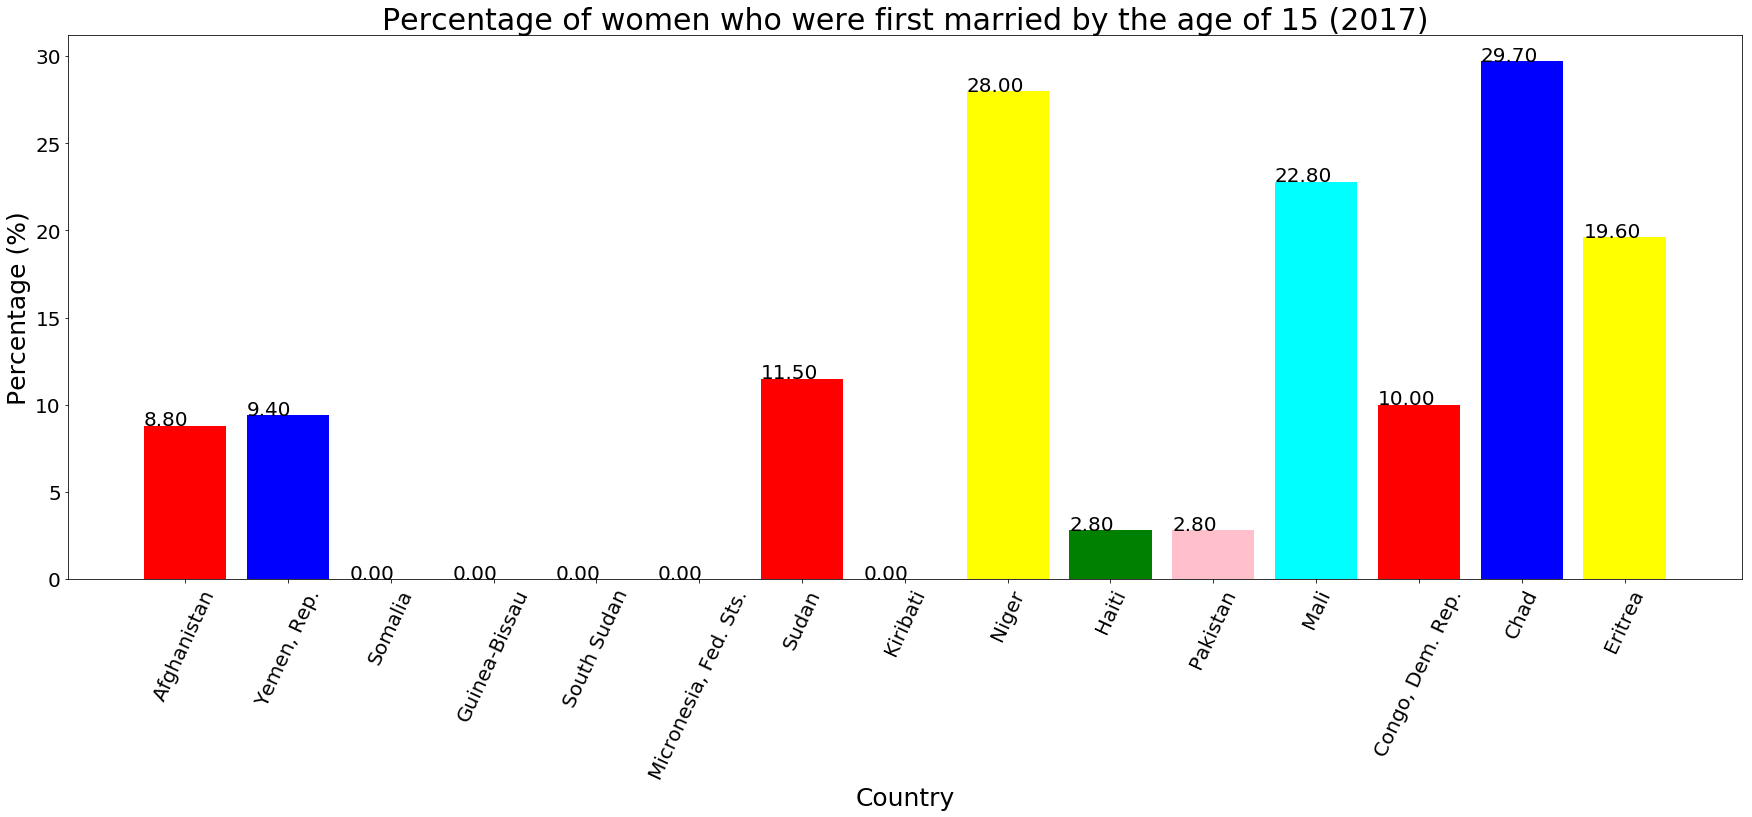

In [48]:
married15_2014_worst15
makeBarPlot(married15_2014_worst15['country'], married15_2014_worst15['value_y'], 
            "Percentage of women who were first married by the age of 15 (2017)", "Country", "Percentage (%)")

### 6.2 Correlation between child marriages and Gender Equality Index

In this paragraph a scatterplot of the relation between child marriage and the Gender Equality Index (GEI) is created. This function is explained in paragraph 1.4 *Graphs*. A scatterplot shows if there is correlation between two indicators. The dots are the countries. They have a value for child marriage and for GEI, where these values cross the dot is placed. This way the relation between the two indicators can be established.

Looking at the scatterplot of child marriage and GEI, there is no correlation visible. But this conclusion cannot be drawn with certainty due to the missing data points in the data frame. However, the relation showed is, how higher the Gender Equality Index, the lower the percentage of child marriages is. This is a positive relation and supports the assumption made.

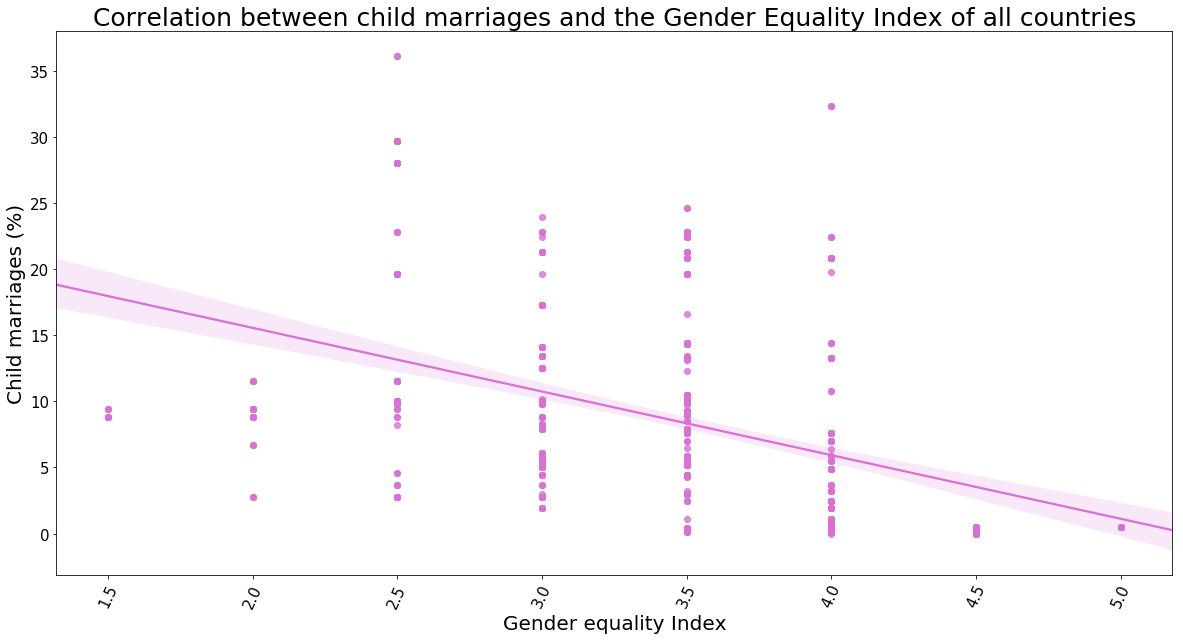

In [75]:
makeScatter(GEI_all['value'], married15_all['value'], 
            "Correlation between child marriages and the Gender Equality Index of all countries",
            'Gender equality Index', "Child marriages (%)")

### 6.3 Conclusion

In this chapter, first an overview of the child marriages at the age of 15 per country is evaluated. this is done for the 15 countries with the lowest Gender Equality Index (GEI). From this bar plot it showed there is some important data missing and for the conclusions this should be taken into account. 

The bar plot also showed that Chad and Niger have a relatively high child marriage at the age of 15 percentage. Haïti scored relatively low compared to the other countries.

Next, the correlation between the child marriage indicator and the GEI is analysed. There is no correlation visible, but this can also be due to the missing data. However, the relation that is visible shows that if the GEI is higher, the percentage of child marriage is lower. This is a positive relation.


# 7. Conclusion

This research paper started with the question: *" Will ending child marriage contribute to gender equality"*? Literature research turned out that ending child marriages would have impact on multiple topics concerning gender equality. Gender equality per country can be measured with the Gender Equality Index (GEI). To answer the research question the choice was made to check multiple of these topics in the relation with the GEI. This way it would show if there is a relation between these indicators. If there is a relation between these indicators is means, improving this topic will increase gender equality. The last question analysed if there is a relation between child marriages and the GEI. If this is the case and the other topics will improve gender equality, the assumption can be made that ending child marriage will indeed contribute to gender equality. The topics used are Gross Domestic Product (GDP) of a country, education and healthcare. 

To create a scope for the paper and not making it to big, only the 15 countries with the lowest GEI are selected in a data frame. This data frame is used throughout the whole paper. This countries have to change the most to get the Sustainable Development Goal of gender equality in 2030.

The first sub-question leaded to the conclusion GDP has a correlation with GEI. How higher the GDP of a country the higher the value of GEI. There were a few outliers, these are countries with relatively high GDP and relatively low GEI (because the countries belong to the lowest 15 countries on GEI). Micronesia is one of these outliers. The economy is clearly flourishing and maybe this will lead to an increase in gender equality. For now, they are an exception on the relation. 

The second sub-question about education concluded there is inequality between men and women in education. In primary education the enrolment rate was slightly higher for men than women, but this difference is small. However, looking at completion rate of primary school, there was a huge difference between the rate of men and women. Man finished primary school way more often than woman. Also for secondary school, the differences are big. Man are more likely to enrol for secondary school than woman. Last, the literacy rate is compared. The data from this rate were a bit unreliably, compared to the results of the other plots. The rate showed however an equal distribution between men and women. These results show that despite the low completion rate of primary school among women, they tech themselves or each other how to read. Otherwise the literacy rate can't be more equal.

The next sub-question was about health. The indicator chosen for health wasn't appropriate  to show what the research question wanted. The conclusion from this sub-question is that women have a higher survival rate than men over all the countries. Also the survival rate is relatively high, only Mali has a low survival rate.

The last sub-question was about the child marriages. For this question the indicator "girls married for first time at age 15" this data was gathered from girls between 20-24 years old. This question had a lot of missing data so this should be taken into account while reading the analysis. The bar plot showed that for Chad and Niger the rate was relatively high. Haiti scored relatively low on the indicator. The correlation showed there is no strong relation between child marriage and GEI. This can be due to the missing data. The relation that was showed, showed a positive relation. How higher the GEI, how lower the percentage of child marriage.

Concluded can be stated that ending child marriage will probably help with achieving the gender equality. Because girls will get more time to finish school and get more chances in life. They can contribute to the economy of a country and increasing the GDP. This will also contribute to gender equality. Ending child marriage will give the change to girls to be part of the society and contribute and that way it will help reach gender equality.


# Discussion

For this research a few things can be taken into account and improved by re-doing the research. First of all, the data can be more reliable. Now, a problem was that there was a lot of lacking data. This is filled in with a function that uses known values to predict the missing values. This is not really reliable and can be improved for re-doing the research. This also puts some doubt on the conclusions drawn in this paper. Next, not all needed indicators where available. By redoing this research some new indicators such as gender appropriate healthcare can be add to make the research better. Last, the python knowledge of the programmers is basic. They are new to python and don't know the advanced skills other programmers have gathered over time. If programmers had more experience, the analyses could be better. 

Tips for doing more research is a making a model to predict if the Sustainable Development Goals (SDG) will be reached in 2030. Will the goal of gender equality in all countries be reached by 2030? Another thing is more in-depth research to the relation between the topics and gender equality.

The recommendations following from the conclusions will be:
1) Start explaining to the countries that ending child marriage will benefit the country. Let them understand it will boost their economy and GDP.
2) Make sure girls get appropriate healthcare and information about their health.
3) Try gathering the missing data so the analyses executed can be optimised

The research can be improved in many points but visualising the data and looking for relations between indicators is useful information. It's a good starting point for further research but it gives a general understanding of the problem and where the countries stand on gender equality. It also provides a first insight in solutions for improving the gender equality.


# Bibliography

*
African Development Bank. (n.d.). South Sudan Economic Outlook. Retrieved November 1, 2018, from https://www.afdb.org/en/countries/east-africa/south-sudan/south-sudan-economic-outlook/
*

*
DESA. (2018). Goal 5 .:. Sustainable Development Knowledge Platform. Retrieved October 23, 2018, from https://sustainabledevelopment.un.org/sdg5
*

*
EIGE. (n.d.). About | Gender Equality Index | EIGE. Retrieved November 1, 2018, from https://eige.europa.eu/gender-equality-index/about
*

*
Gallo, A. (2017, November 30). A Refresher on Regression Analysis. Retrieved November 2, 2018, from https://hbr.org/2015/11/a-refresher-on-regression-analysis
*

*
Gandel, S. (2013, December 31). http://fortune.com. Retrieved November 1, 2018, from http://fortune.com/2013/12/31/the-financial-crisis-of-2014/
*

*
Girls not Brides. (2018). What is the impact of Child Marriage:. Retrieved October 23, 2018, from https://www.girlsnotbrides.org/themes/sustainable-development-goals-sdgs/
*

*
Hall, M. (2018, October 22). What Is Purchasing Power Parity (PPP)? Retrieved November 1, 2018, from https://www.investopedia.com/updates/purchasing-power-parity-ppp/
*

*
Kenney, C. (2010, February 17). NPR Choice page. Retrieved November 1, 2018, from https://choice.npr.org/index.html?origin=https://www.npr.org/sections/money/2010/02/damage_from_haiti_quake_expect.html?t=1541106539012
*

*
United Nations. (2018). About the Sustainable Development Goals - United Nations Sustainable Development. Retrieved October 23, 2018, from https://www.un.org/sustainabledevelopment/sustainable-development-goals/
*

*
UNDP. (2018). Goal 5: Gender equality | UNDP. Retrieved October 23, 2018, from http://www.undp.org/content/undp/en/home/sustainable-development-goals/goal-5-gender-equality.html
*

*
United Nations. (2018b). The Sustainable Development Goals Report 2018 (978-92-1-363317-5). Retrieved from https://unstats.un.org/sdgs/files/report/2018/thesustainabledevelopmentgoalsreport2018.pdf
*